**Step 1: Data Preparation**

  1. **Download COVID-19 Data**
    
      Fetch the dataset from OWID.

  2. **Filter Data for China and the US**
    
      Use the `location` column to extract data for `China` and `United States`. Focus on:
        + `new_cases`
        + `new_deaths`
        + `stringency_index`

  3. **Supplement with Policy Data**
  
      + For China: Collect data on lockdowns, mass testing, and zero-COVID strategies.
      + For the US: Collect data on federal/state-level measures, vaccination rollouts, and public health mandates.
      + Use sources like government websites and the Oxford COVID-19 Government Response Tracker (OxCGRT).

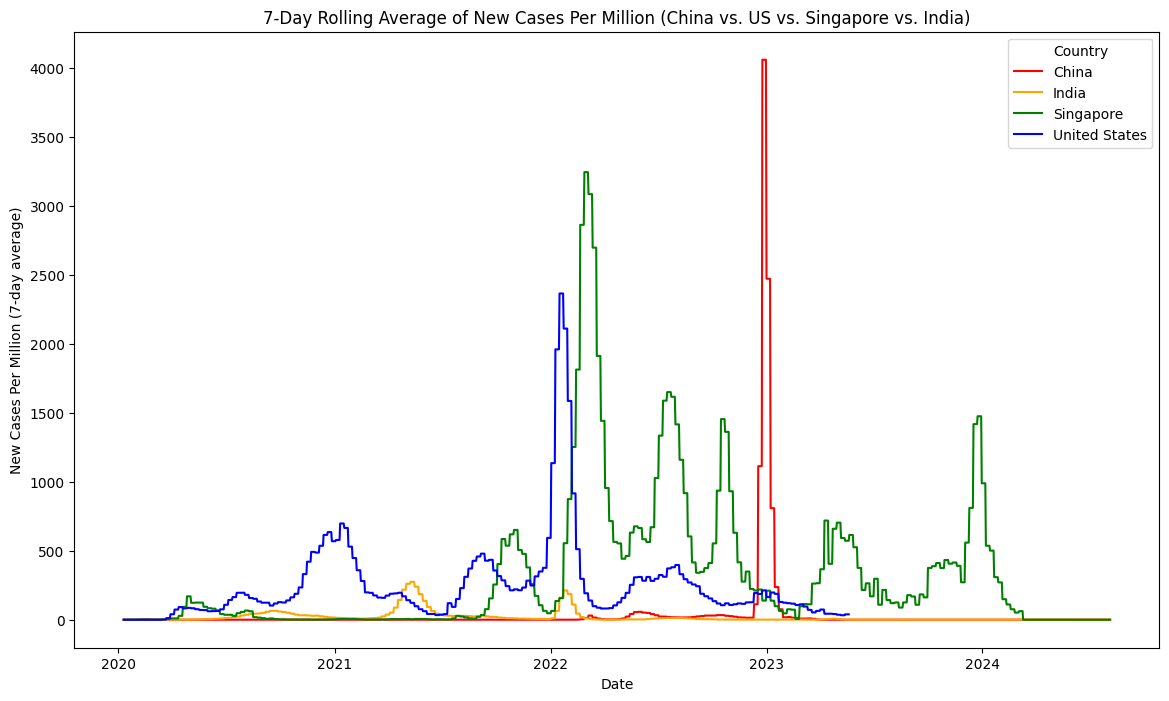

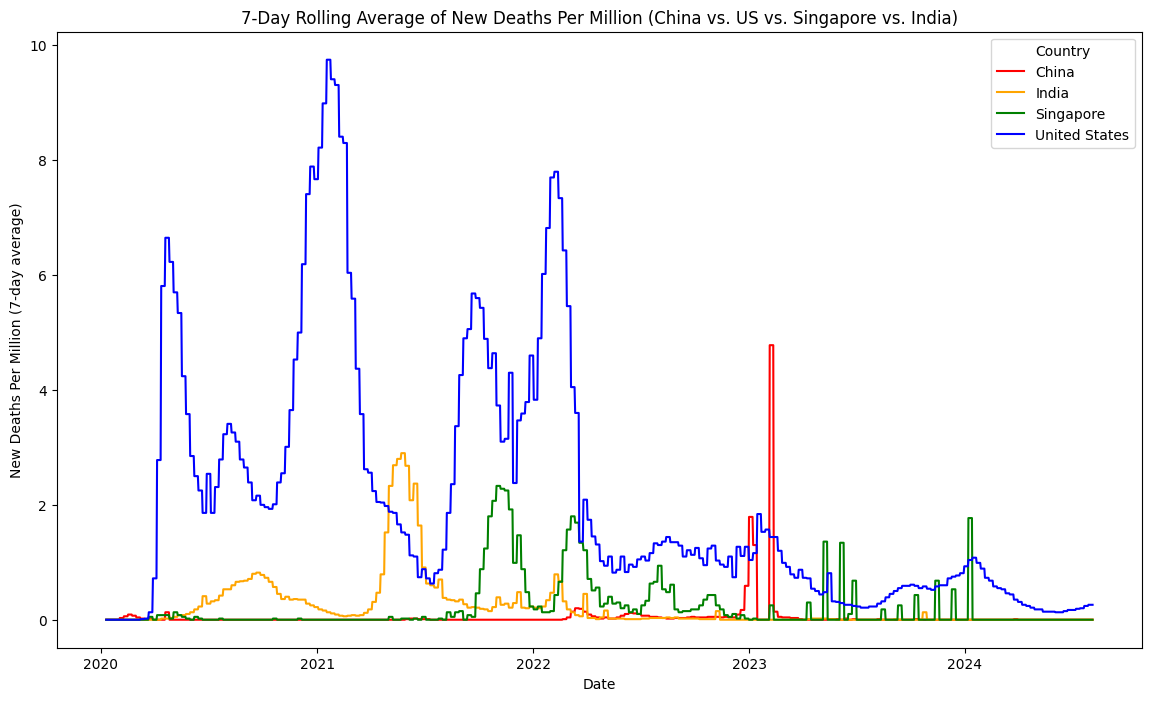

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load COVID-19 data
covid_data = pd.read_csv("owid-covid-data.csv")

# Filter for China, US, Singapore, India
countries = ["China", "United States", "Singapore", "India"]
df = covid_data[covid_data['location'].isin(countries)]

# Focus on relevant columns
df = df[["date", "location", "new_cases_per_million", "new_deaths_per_million", "stringency_index", "population", "new_cases_smoothed_per_million", "new_deaths_smoothed_per_million"]]
df['date'] = pd.to_datetime(df['date'])

# # Rolling averages for new cases per million and deaths per million
# df['new_cases_7day_per_million'] = df.groupby('location')['new_cases_per_million'].transform(lambda x: x.rolling(7).mean())
# df['new_deaths_7day_per_million'] = df.groupby('location')['new_deaths_per_million'].transform(lambda x: x.rolling(7).mean())

custom_palette = {
    "China": "red",
    "United States": "blue",
    "Singapore": "green",
    "India": "orange"
}

# Plot trends for new cases per million
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='date', y='new_cases_smoothed_per_million', hue='location', palette=custom_palette)
plt.title("7-Day Rolling Average of New Cases Per Million (China vs. US vs. Singapore vs. India)")
plt.xlabel("Date")
plt.ylabel("New Cases Per Million (7-day average)")
plt.legend(title="Country")
plt.show()

# Plot trends for new deaths per million
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='date', y='new_deaths_smoothed_per_million', hue='location', palette=custom_palette)
plt.title("7-Day Rolling Average of New Deaths Per Million (China vs. US vs. Singapore vs. India)")
plt.xlabel("Date")
plt.ylabel("New Deaths Per Million (7-day average)")
plt.legend(title="Country")
plt.show()


**Step 4: Advanced Integration of Policy Data**

**1. Load and Merge Data**

  + **COVID-19 Data:** Use the OWID dataset for cases and deaths.
  + **Policy Data:** Use the `OxCGRT_compact_national_v1.csv` for `stringency_index` and relevant policy indicators.
  + **Vaccination Data:** Use `OxCGRT_vaccines_full_national_v1.csv` for vaccination metrics like `total_vaccinations_per_hundred`.

**Steps for Data Merging:**

  1. **Filter and Align Dates:** Ensure the `date` columns in all datasets are in the same format (`YYYY-MM-DD`).
  2. **Merge Datasets:** Use `location` and `date` as keys for merging OWID, policy, and vaccination data.
  3. **Focus on Relevant Metrics: Extract:**
      + COVID-19: `new_cases`, `new_deaths`
      + Policies: `stringency_index`, key policy flags (e.g., school closures, workplace closures)
      + Vaccination: `total_vaccinations_per_hundred`

In [3]:
# Load datasets
covid_data = pd.read_csv("owid-covid-data.csv", parse_dates=["date"])
policy_data = pd.read_csv("OxCGRT_compact_national_v1.csv", parse_dates=["Date"])
vaccination_data = pd.read_csv("OxCGRT_vaccines_full_national_v1.csv", parse_dates=["Date"])

# Filter for China and US
countries = ["China", "United States", "Singapore", "India"]
covid_data = covid_data[covid_data["location"].isin(countries)]
policy_data = policy_data[policy_data["CountryName"].isin(countries)]
vaccination_data = vaccination_data[vaccination_data["CountryName"].isin(countries)]

# Rename columns for consistency
policy_data.rename(columns={"Date": "date", "CountryName": "location"}, inplace=True)
vaccination_data.rename(columns={"Date": "date", "CountryName": "location"}, inplace=True)

# Merge datasets
merged_data = pd.merge(covid_data, policy_data, on=["location", "date"], how="inner")
merged_data = pd.merge(merged_data, vaccination_data, on=["location", "date"], how="inner")

# Focus on relevant columns
merged_data = merged_data[
    ["date", "location", "new_cases", "new_deaths", "new_cases_per_million", "new_deaths_per_million", "stringency_index", 
     "total_vaccinations_per_hundred"]
]


**Step 5: Advanced Visualizations**

**1. Timeline with Policy Annotations**

Create line plots of `new_cases` and `new_deaths` over time, annotated with significant policy changes.

Example (China's early lockdown and US vaccination campaign):

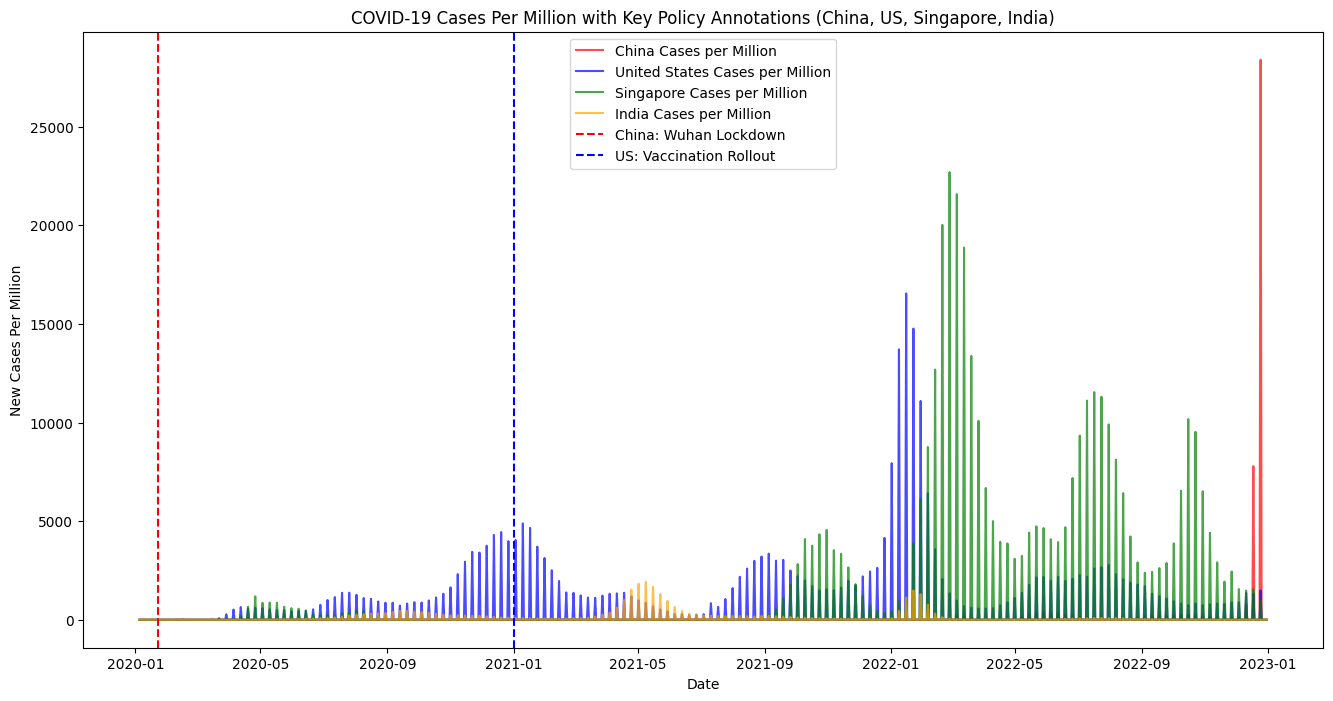

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 确保 'date' 列是 datetime 类型
merged_data['date'] = pd.to_datetime(merged_data['date'])

# 设定需要比较的国家
countries = ["China", "United States", "Singapore", "India"]

color_mapping = {
    "China": "red",
    "United States": "blue",
    "Singapore": "green",
    "India": "orange"
}

# 绘制每百万人感染人数的曲线
plt.figure(figsize=(16, 8))
for country in countries:
    subset = merged_data[merged_data["location"] == country]
    plt.plot(subset["date"], subset["new_cases_per_million"], color=color_mapping[country], label=f"{country} Cases per Million", alpha=0.7)

# 标记关键政策
plt.axvline(pd.Timestamp("2020-01-23"), color="red", linestyle="--", label="China: Wuhan Lockdown")
plt.axvline(pd.Timestamp("2021-01-01"), color="blue", linestyle="--", label="US: Vaccination Rollout")

# 添加标题和标签
plt.title("COVID-19 Cases Per Million with Key Policy Annotations (China, US, Singapore, India)")
plt.xlabel("Date")
plt.ylabel("New Cases Per Million")
plt.legend()

# 显示图形
plt.show()


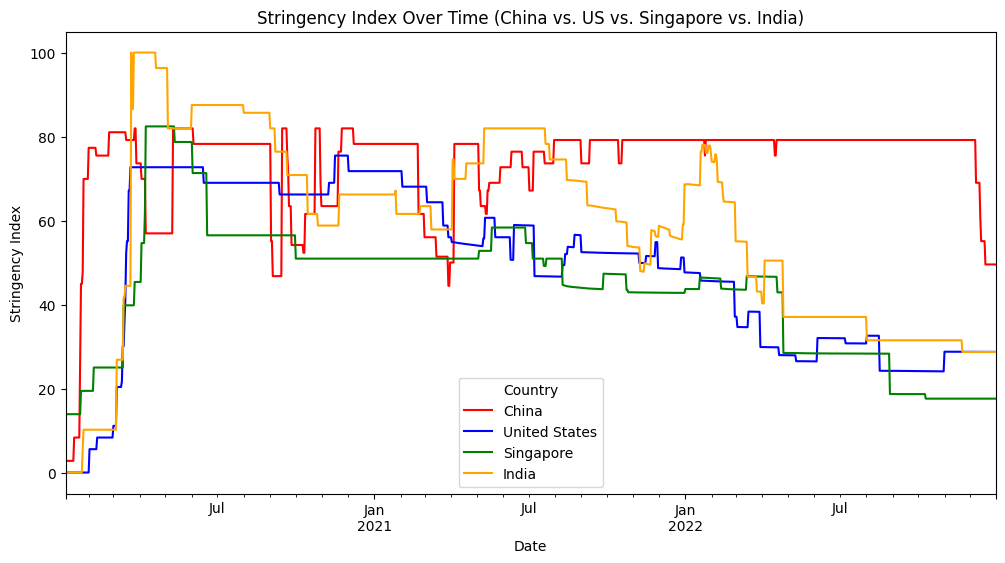

In [5]:
import matplotlib.pyplot as plt

# 选择你感兴趣的国家，比如 China 和 United States
for country in countries:
    country_data = merged_data[merged_data["location"] == country].set_index("date")
    country_data["stringency_index"].plot(label=country, figsize=(12, 6), color=color_mapping[country])

plt.title("Stringency Index Over Time (China vs. US vs. Singapore vs. India)")
plt.xlabel("Date")
plt.ylabel("Stringency Index")
plt.legend(title="Country")
plt.show()


**2. Policy Stringency vs. Cases/Deaths**

  Scatter or line plot showing `stringency_index` against `new_cases`. Correlation can also be calculated:

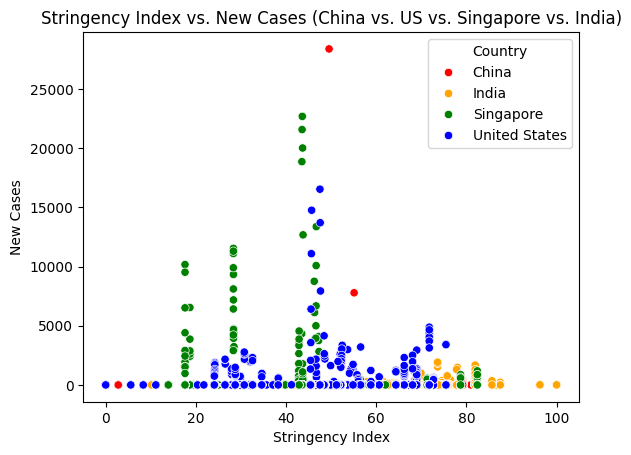

                                     stringency_index  new_cases_per_million
location                                                                    
China         stringency_index               1.000000              -0.066279
              new_cases_per_million         -0.066279               1.000000
India         stringency_index               1.000000               0.121582
              new_cases_per_million          0.121582               1.000000
Singapore     stringency_index               1.000000              -0.091833
              new_cases_per_million         -0.091833               1.000000
United States stringency_index               1.000000               0.031789
              new_cases_per_million          0.031789               1.000000


In [6]:
sns.scatterplot(data=merged_data, x="stringency_index", y="new_cases_per_million", hue="location", palette=custom_palette)
plt.title("Stringency Index vs. New Cases (China vs. US vs. Singapore vs. India)")
plt.xlabel("Stringency Index")
plt.ylabel("New Cases")
plt.legend(title="Country")
plt.show()

# Calculate correlation
correlation = merged_data.groupby("location")[["stringency_index", "new_cases_per_million"]].corr()
print(correlation)


**3. Comparative Metrics**

  Use bar plots to compare total cases, deaths, and vaccination rates per million for both countries.

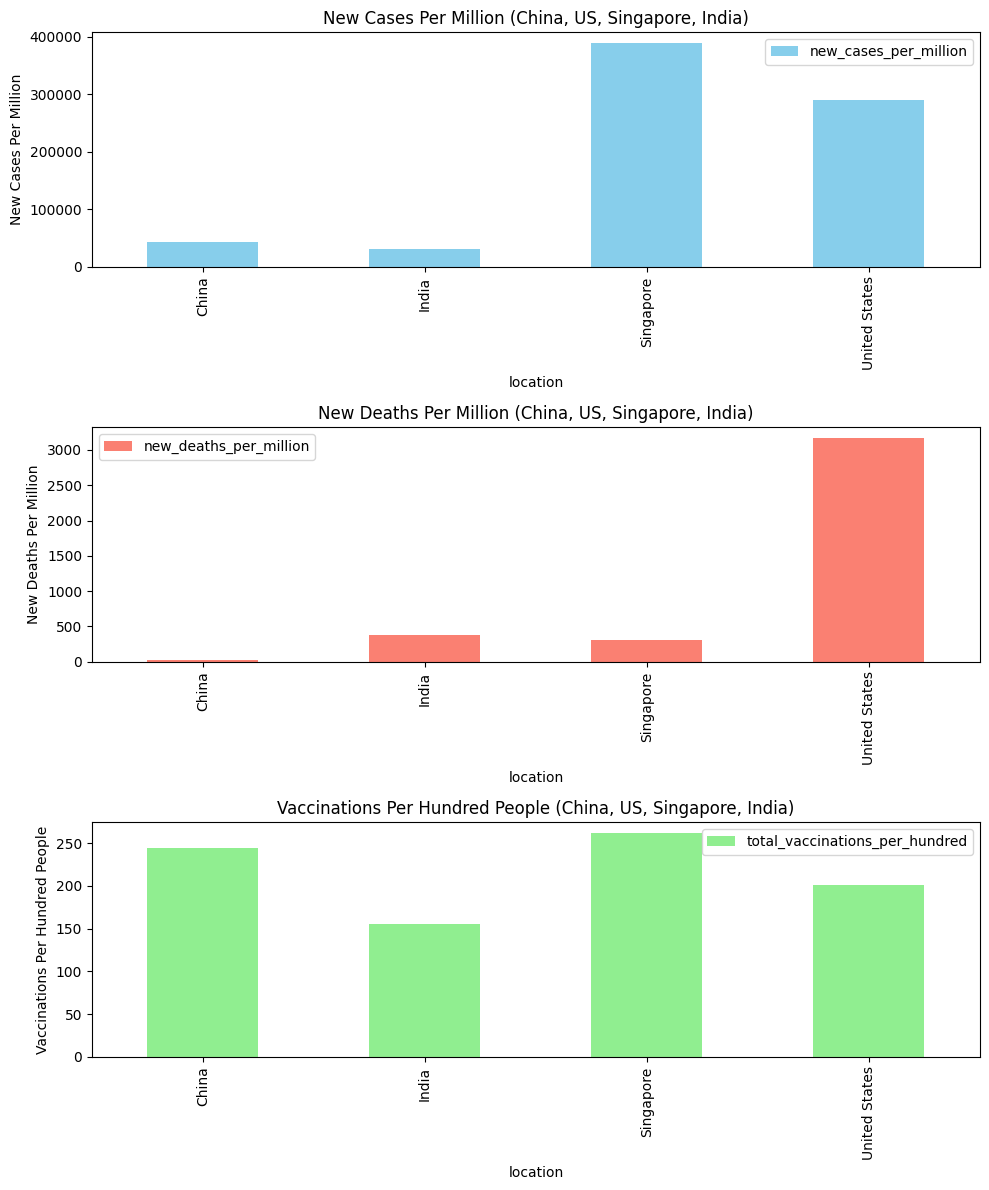

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 筛选相关国家的数据
filtered_data = merged_data[merged_data["location"].isin(countries)]

# 按国家分组并计算所需的统计量
summary = filtered_data.groupby("location").agg({
    "new_cases_per_million": "sum",   # 累计每百万人新病例
    "new_deaths_per_million": "sum", # 累计每百万人新死亡
    "total_vaccinations_per_hundred": "max" # 最大的疫苗接种率
}).reset_index()

# 计算每百万人感染的总病例数和死亡数
summary["new_cases_per_million"] = summary.apply(
    lambda row: row["new_cases_per_million"] if row["location"] in countries else 0, axis=1
)

summary["new_deaths_per_million"] = summary.apply(
    lambda row: row["new_deaths_per_million"] if row["location"] in countries else 0, axis=1
)

# 创建一个包含三行一列的子图
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# 绘制每百万人数据的条形图
summary.set_index("location")[["new_cases_per_million"]].plot(kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("New Cases Per Million (China, US, Singapore, India)")
axes[0].set_ylabel("New Cases Per Million")

summary.set_index("location")[["new_deaths_per_million"]].plot(kind="bar", ax=axes[1], color="salmon")
axes[1].set_title("New Deaths Per Million (China, US, Singapore, India)")
axes[1].set_ylabel("New Deaths Per Million")

summary.set_index("location")[["total_vaccinations_per_hundred"]].plot(kind="bar", ax=axes[2], color="lightgreen")
axes[2].set_title("Vaccinations Per Hundred People (China, US, Singapore, India)")
axes[2].set_ylabel("Vaccinations Per Hundred People")

# 调整布局，避免标题重叠
plt.tight_layout()
plt.show()


**4. Vaccination Impact**

  Dual-axis plot of vaccination rates and new cases:

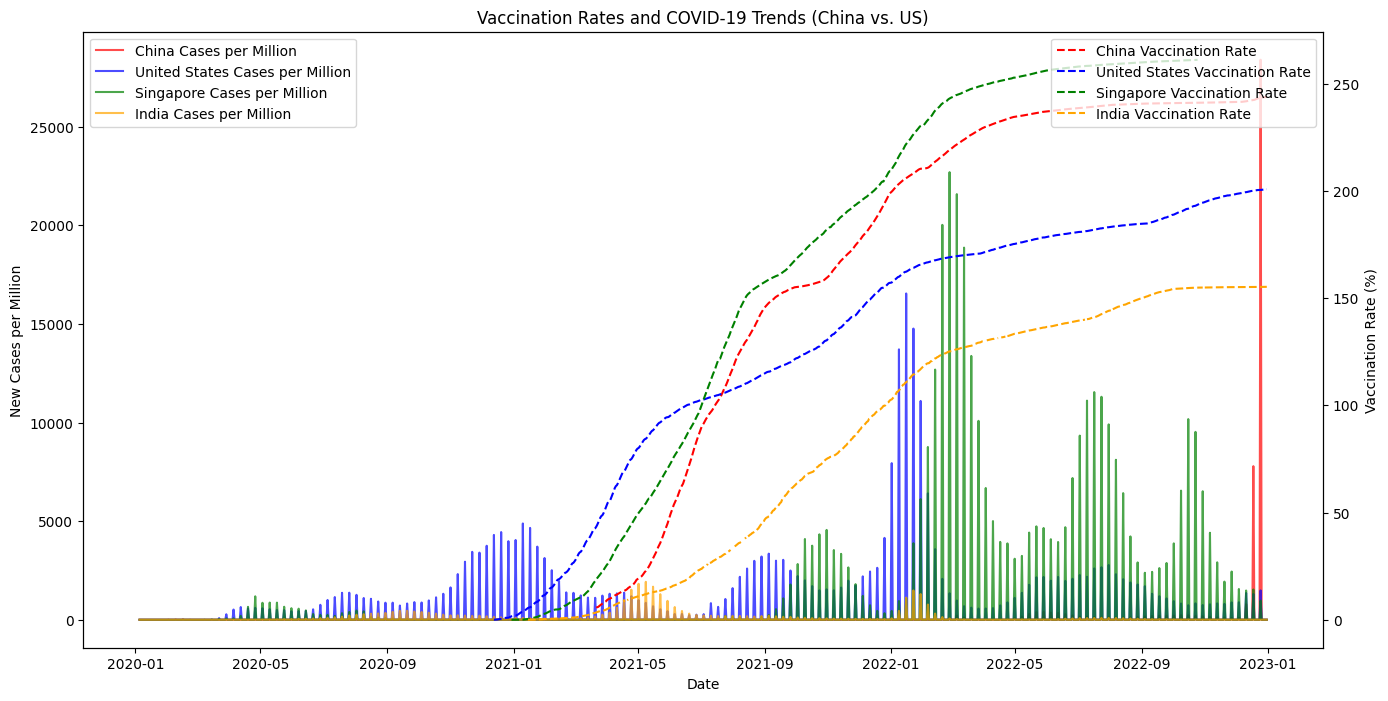

In [8]:
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot new_cases_per_million
for country in countries:
    subset = merged_data[merged_data["location"] == country]
    ax1.plot(subset["date"], subset["new_cases_per_million"], color=color_mapping[country], label=f"{country} Cases per Million", alpha=0.7)

# Plot vaccination rates
ax2 = ax1.twinx()
for country in countries:
    subset = merged_data[merged_data["location"] == country]
    ax2.plot(subset["date"], subset["total_vaccinations_per_hundred"], color=color_mapping[country], label=f"{country} Vaccination Rate", linestyle="--")

ax1.set_title("Vaccination Rates and COVID-19 Trends (China vs. US)")
ax1.set_xlabel("Date")
ax1.set_ylabel("New Cases per Million")
ax2.set_ylabel("Vaccination Rate (%)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


**Step 6: Key Metrics and Insights**

**Statistical Analysis**

  + Correlation between `stringency_index` and `new_cases/new_deaths` for both countries:

In [9]:
correlations = merged_data.groupby("location").apply(
    lambda x: x[["stringency_index", "new_deaths_per_million", "new_deaths_per_million"]].corr()
)
print(correlations)


                                      stringency_index  \
location                                                 
China         stringency_index                1.000000   
              new_deaths_per_million         -0.014785   
              new_deaths_per_million         -0.014785   
India         stringency_index                1.000000   
              new_deaths_per_million          0.142405   
              new_deaths_per_million          0.142405   
Singapore     stringency_index                1.000000   
              new_deaths_per_million         -0.037185   
              new_deaths_per_million         -0.037185   
United States stringency_index                1.000000   
              new_deaths_per_million          0.144222   
              new_deaths_per_million          0.144222   

                                      new_deaths_per_million  \
location                                                       
China         stringency_index                     -0.01478

Insights:

  + China:
    - Strict early lockdown and Zero-COVID policies minimized cases and deaths but prolonged social restrictions.
    - Vaccination rollout began later but was widespread.

  + US:
    - Delayed lockdown measures led to higher initial case counts.
    - Vaccination campaigns dramatically reduced deaths during subsequent waves.
    - Decentralized policies caused variation in outcomes across states.

1. Advanced Visualizations

  + **Heatmap of Stringency vs. Cases/Deaths Over Time**

    Heatmaps can show how stringency levels correlate with COVID cases/deaths over time.

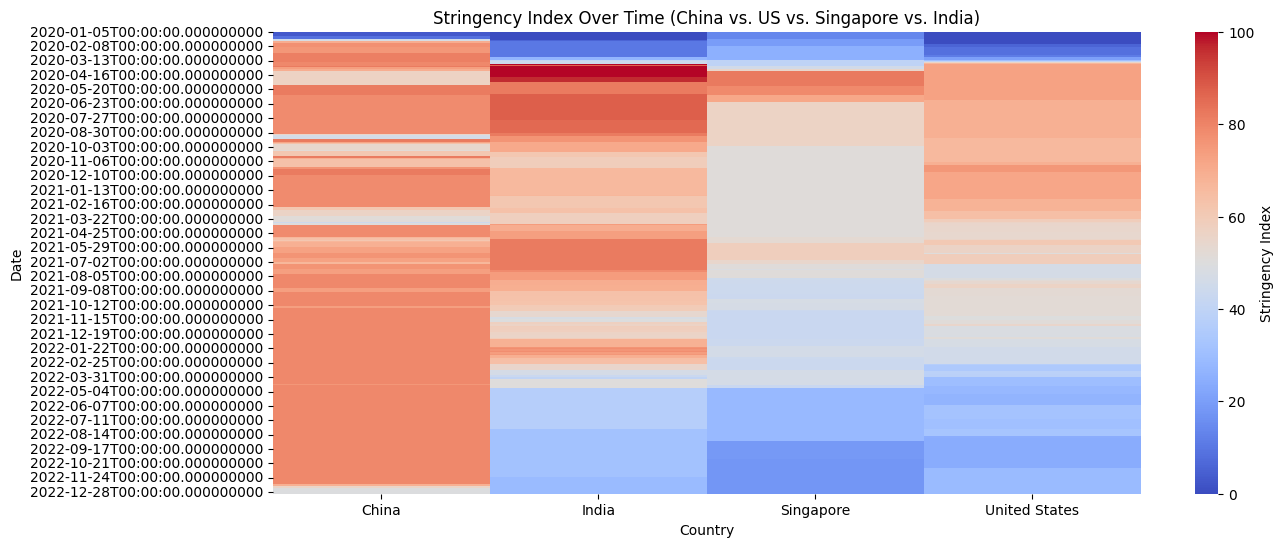

In [10]:
import seaborn as sns

# Pivot data
heatmap_data = merged_data.pivot_table(index="date", columns="location", values="stringency_index")

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", cbar_kws={"label": "Stringency Index"})
plt.title("Stringency Index Over Time (China vs. US vs. Singapore vs. India)")
plt.xlabel("Country")
plt.ylabel("Date")
plt.show()


  + **Time-Series Decomposition**

    Break down `new_cases` into trend, seasonality, and residual components to better understand temporal patterns.

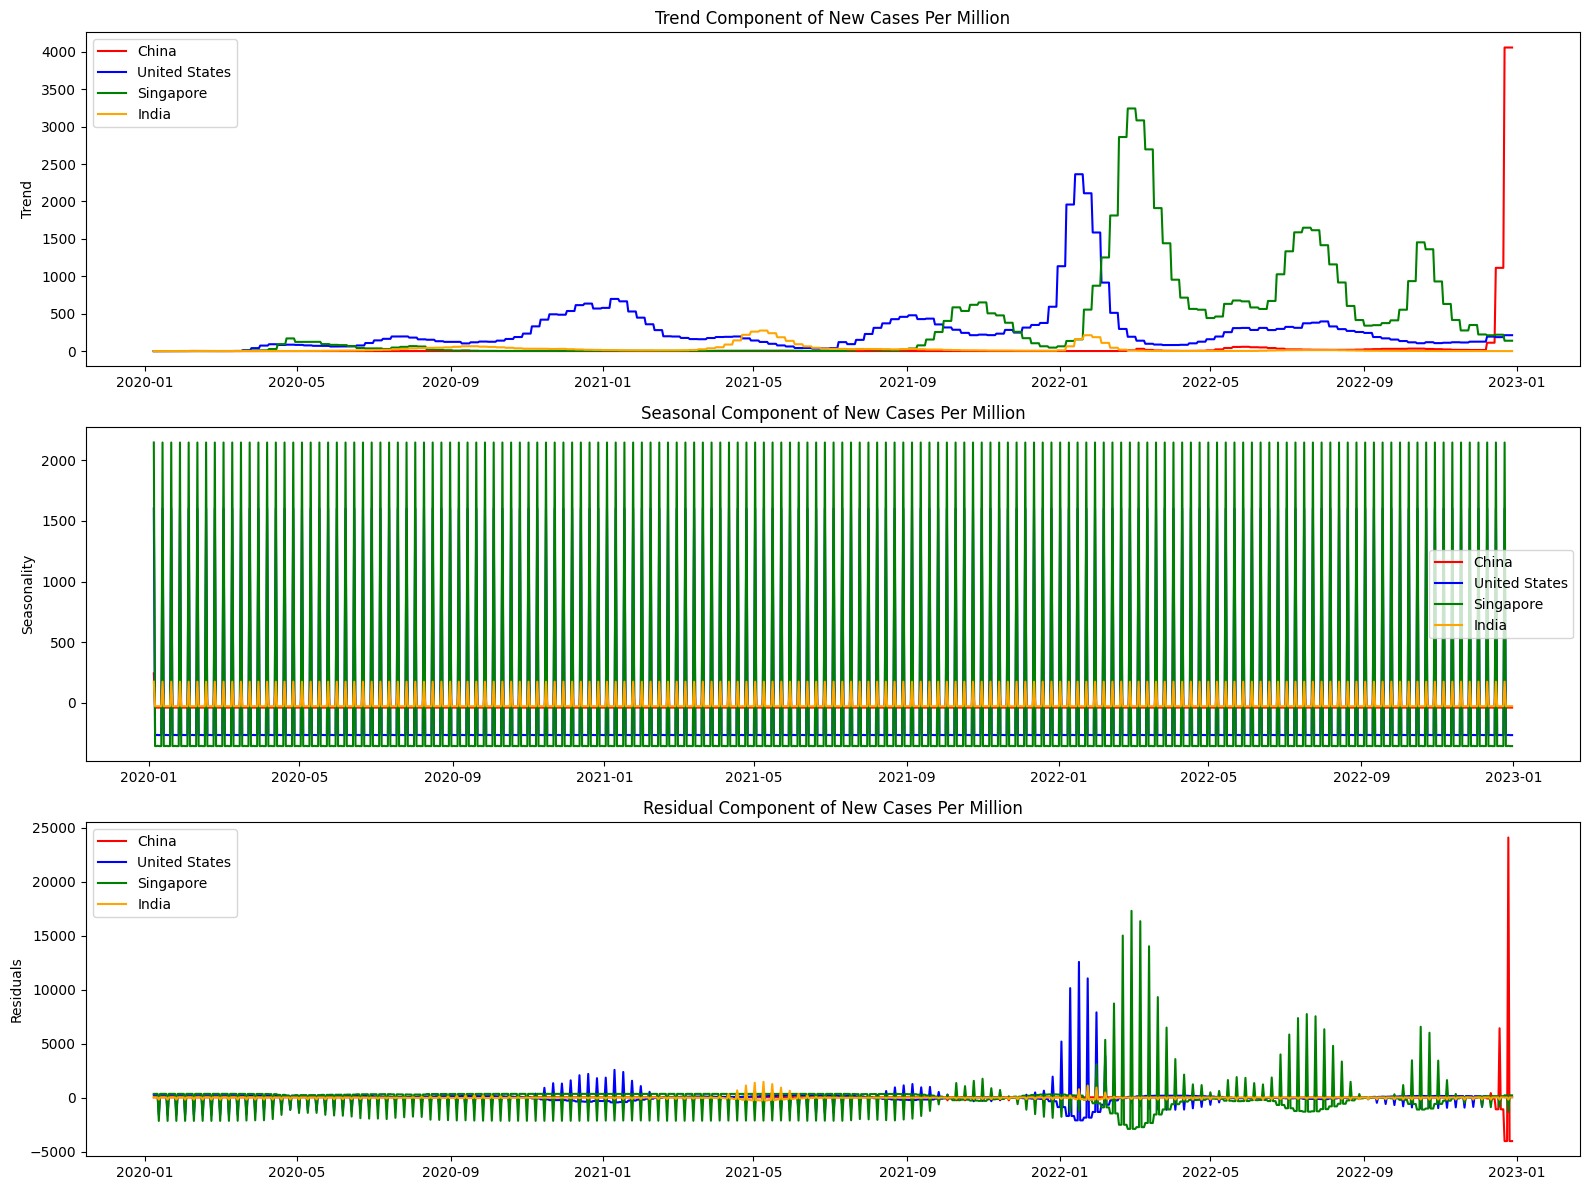

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose for each country
china_data = merged_data[merged_data["location"] == "China"].set_index("date")
us_data = merged_data[merged_data["location"] == "United States"].set_index("date")
sg_data = merged_data[merged_data["location"] == "Singapore"].set_index("date")
india_data = merged_data[merged_data["location"] == "India"].set_index("date")

# Create subplots for each decomposition component
fig, axes = plt.subplots(3, 1, figsize=(16, 12))  # 3 rows, 1 column

# Decompose the data for each country
countries = [("China", china_data), ("United States", us_data), ("Singapore", sg_data), ("India", india_data)]
decompositions = {country: seasonal_decompose(data["new_cases_per_million"].fillna(0), model="additive", period=7) for country, data in countries}

# Plot trend for each country
for i, (country, decomposition) in enumerate(decompositions.items()):
    axes[0].plot(decomposition.trend, color=color_mapping[country], label=country)
axes[0].set_title('Trend Component of New Cases Per Million')
axes[0].set_ylabel('Trend')
axes[0].legend()

# Plot seasonal component for each country
for i, (country, decomposition) in enumerate(decompositions.items()):
    axes[1].plot(decomposition.seasonal, color=color_mapping[country], label=country)
axes[1].set_title('Seasonal Component of New Cases Per Million')
axes[1].set_ylabel('Seasonality')
axes[1].legend()

# Plot residual component for each country
for i, (country, decomposition) in enumerate(decompositions.items()):
    axes[2].plot(decomposition.resid, color=color_mapping[country], label=country)
axes[2].set_title('Residual Component of New Cases Per Million')
axes[2].set_ylabel('Residuals')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## 1.5 Policy Lag Impact on New Cases

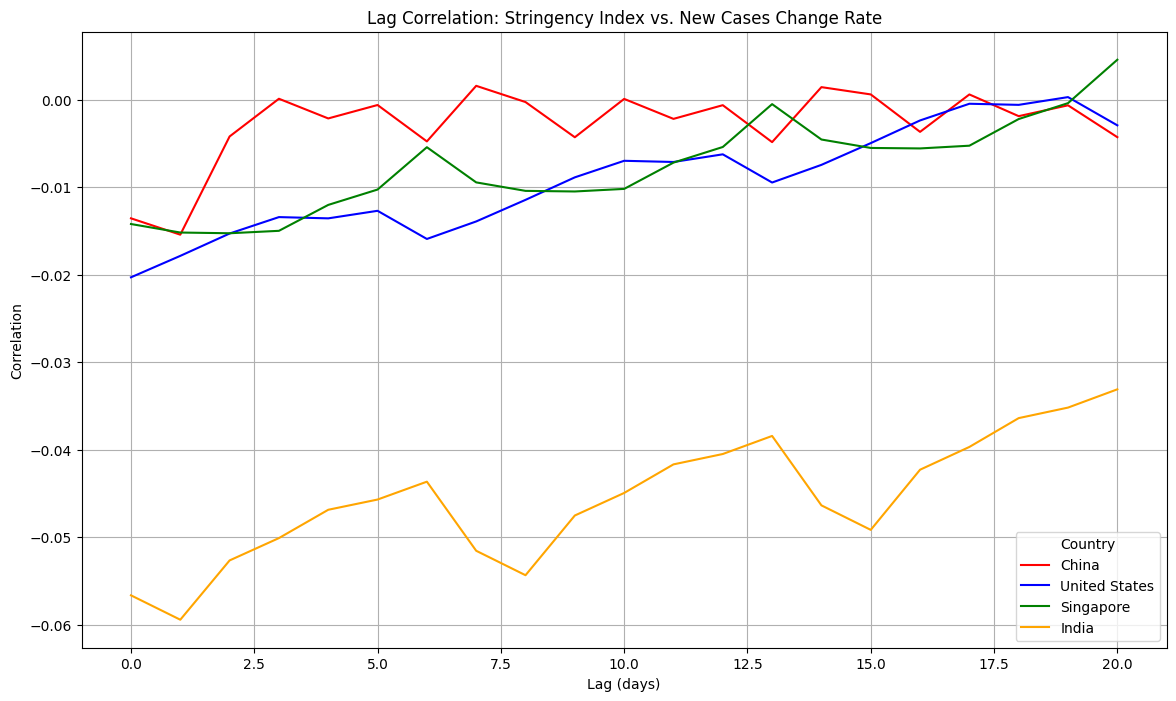

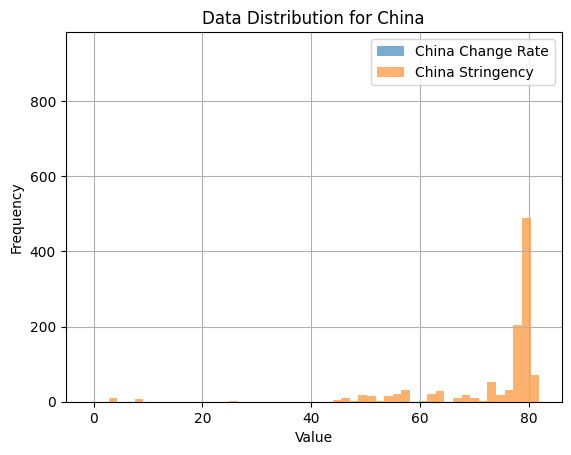

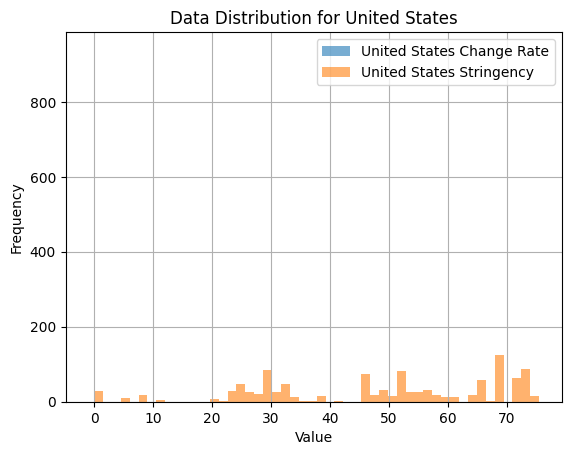

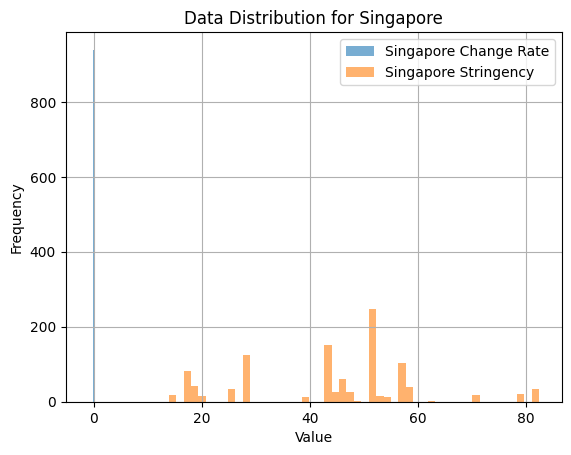

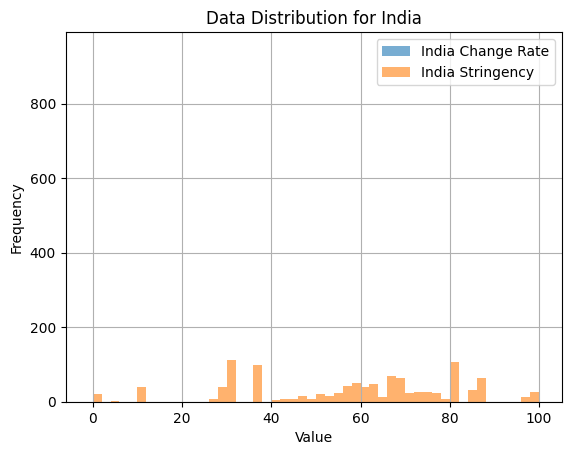

In [17]:
# Ensure 'countries' contains only country names
country_names = [country[0] for country in countries]  # Extract country names from the tuple structure

# Calculate daily percentage change in new cases for each country
merged_data["new_cases_change_rate"] = merged_data.groupby("location")["new_cases_per_million"].pct_change()

# Replace infinite values with NaN and then fill with 0
merged_data["new_cases_change_rate"].replace([float("inf"), float("-inf")], float("nan"), inplace=True)
merged_data["new_cases_change_rate"].fillna(0, inplace=True)

# Define lagged stringency index
lags = range(0, 21)  # Lag from 0 to 20 days
correlations = {country: [] for country in country_names}  # Dictionary for storing correlations

# Calculate correlation between lagged stringency index and new cases change rate
for lag in lags:
    for country in country_names:
        subset = merged_data[merged_data["location"] == country].copy()
        subset["lagged_stringency"] = subset["stringency_index"].shift(lag)
        # Drop NaN values before correlation
        valid_data = subset[["lagged_stringency", "new_cases_change_rate"]].dropna()
        if not valid_data.empty:
            corr = valid_data["lagged_stringency"].corr(valid_data["new_cases_change_rate"])
        else:
            corr = None  # No valid data for this lag
        correlations[country].append(corr)

# Plot lag correlation for each country
plt.figure(figsize=(14, 8))
for country in country_names:
    # Replace None with 0 or filter valid correlations
    valid_correlations = [corr if corr is not None else 0 for corr in correlations[country]]
    plt.plot(lags, valid_correlations, label=country, color=color_mapping[country])

plt.title("Lag Correlation: Stringency Index vs. New Cases Change Rate")
plt.xlabel("Lag (days)")
plt.ylabel("Correlation")
plt.legend(title="Country")
plt.grid()
plt.show()

# Plot histograms for data distributions
for country in country_names:
    subset = merged_data[merged_data["location"] == country]
    subset["new_cases_change_rate"].hist(bins=50, alpha=0.6, label=f"{country} Change Rate")
    subset["stringency_index"].hist(bins=50, alpha=0.6, label=f"{country} Stringency")
    plt.title(f"Data Distribution for {country}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()




### **Analysis of the Lag Correlation Plot**

The first plot shows the lag correlation between the `stringency_index` and the `new_cases_change_rate` for four countries: China, the United States, Singapore, and India. Here are the insights:

1. **China (Red Line)**:
   - Correlation fluctuates around 0 for most lags, indicating that China's strict policies might have had a relatively immediate effect on case changes.
   - The lack of strong positive or negative correlation suggests that other factors, like testing and public compliance, played a significant role in limiting new cases.

2. **United States (Blue Line)**:
   - The correlation starts low and increases slightly with higher lags, which suggests a delayed effect of policies on case reduction.
   - This aligns with the decentralized nature of policy enforcement in the US, where state-level actions led to delays in response effectiveness.

3. **Singapore (Green Line)**:
   - The correlation is relatively stable and low, with a slight increase at higher lags.
   - Singapore’s timely and comprehensive response, including extensive testing and contact tracing, likely reduced the dependence on stringent policy alone to control case changes.

4. **India (Orange Line)**:
   - India exhibits consistently negative correlations, especially at earlier lags, which may indicate that increased stringency initially correlated with worsening case rates. This could be due to resource constraints, delayed enforcement, or pre-existing community spread overwhelming policy impacts.
   - As the lag increases, the correlation trends closer to 0, reflecting a delayed but eventual alignment of policies with reduced case rates.

---

### **Analysis of Data Distribution Histograms**

Each country’s histograms for `new_cases_change_rate` and `stringency_index` reveal critical characteristics of the data:

#### **China**
- **Stringency Index**:
  - The stringency index is concentrated at higher values (above 60), reflecting China’s consistently strict measures (e.g., lockdowns and zero-COVID strategies).
- **Change Rate**:
  - The distribution is highly skewed, with most values near 0. This indicates effective control over case surges, with minimal fluctuation in new cases.

#### **United States**
- **Stringency Index**:
  - The distribution is more spread out, with peaks at different levels. This reflects the inconsistent application of policies across states and time.
- **Change Rate**:
  - The values are more evenly distributed, with a wider range. This suggests greater variability in case surges, consistent with less uniform policy enforcement and public adherence.

#### **Singapore**
- **Stringency Index**:
  - The distribution is focused on mid-range values (around 40-60), indicating balanced measures that adapt over time rather than extreme strictness.
- **Change Rate**:
  - The distribution is skewed, but there’s a notable tail, reflecting occasional spikes in cases despite generally low rates, possibly due to periodic outbreaks.

#### **India**
- **Stringency Index**:
  - The index shows a broad distribution, with many higher values. This reflects India’s reactive measures (e.g., lockdowns during surges).
- **Change Rate**:
  - The change rate distribution is wider, with frequent spikes. This suggests that despite stringent policies, the massive population and resource limitations hindered consistent case control.

---

### **Key Insights**

1. **Lag Effectiveness**:
   - Policies in China and Singapore had faster impacts due to stricter enforcement, centralized governance, and integrated public health strategies.
   - The US and India showed delayed effects, possibly due to decentralized decision-making and resource disparities.

2. **Stringency and Variability**:
   - Higher and consistent stringency in China correlated with stable case change rates.
   - Variability in stringency in the US and India correlated with greater case fluctuation.

3. **Resource and Context Dependency**:
   - India’s negative correlations suggest that stringency alone is insufficient in resource-constrained settings. Other factors like healthcare capacity and public compliance are critical.

4. **Localized Outbreaks**:
   - Singapore’s low stringency yet effective control highlights the importance of adaptive policies, robust healthcare, and contact tracing in mitigating outbreaks.



## 2.5 Age-Specific Vaccination Coverage vs. Mortality

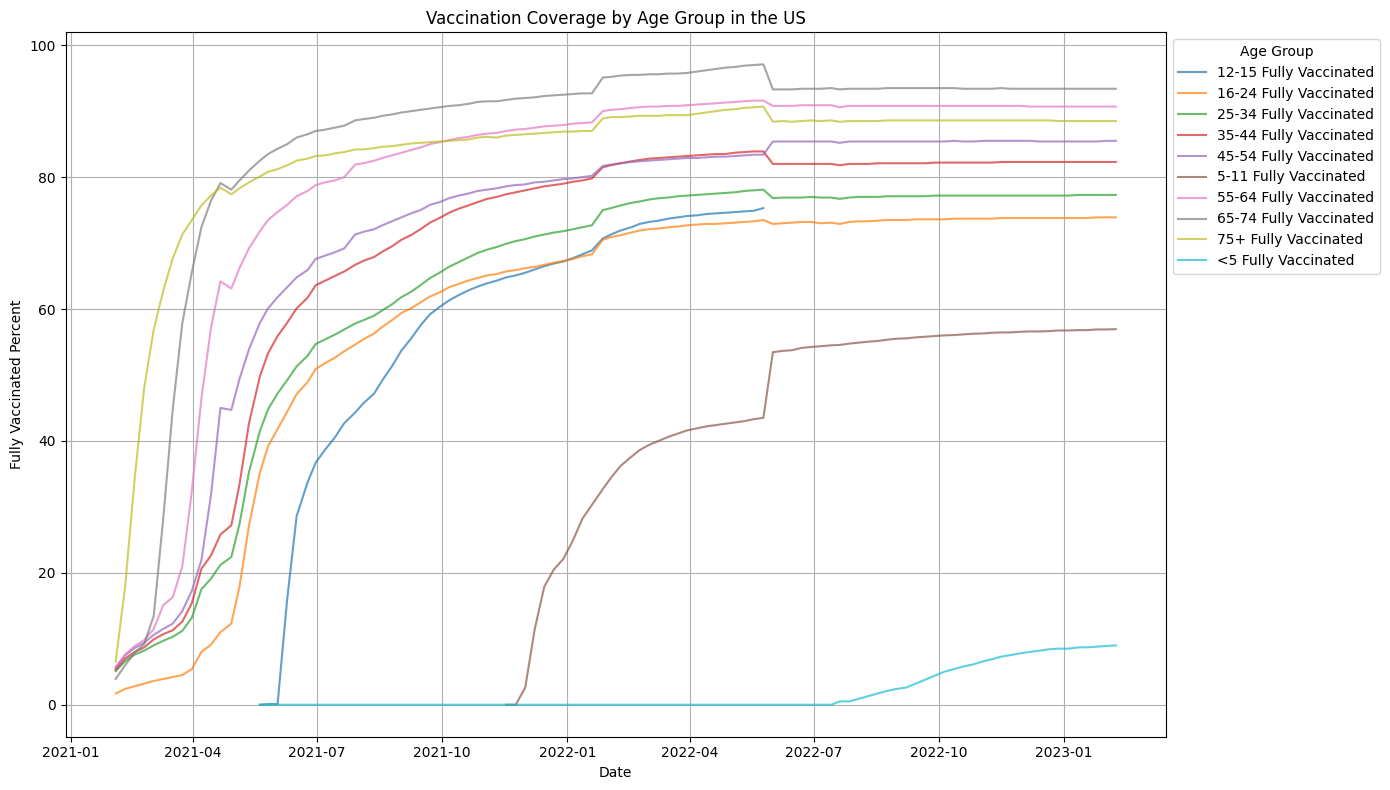

In [43]:
import matplotlib.pyplot as plt

# Plot vaccination coverage trends for each standardized age group
plt.figure(figsize=(14, 8))

# Group data by age group
age_groups = standardized_data["Age group"].unique()

for age_group in age_groups:
    group_data = standardized_data[standardized_data["Age group"] == age_group]
    plt.plot(
        group_data["Date"],
        group_data["Fully Vaccinated Percent"],
        label=f"{age_group} Fully Vaccinated",
        alpha=0.7
    )

# Add titles, labels, and legend
plt.title("Vaccination Coverage by Age Group in the US")
plt.xlabel("Date")
plt.ylabel("Fully Vaccinated Percent")
plt.legend(title="Age Group", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()
plt.show()


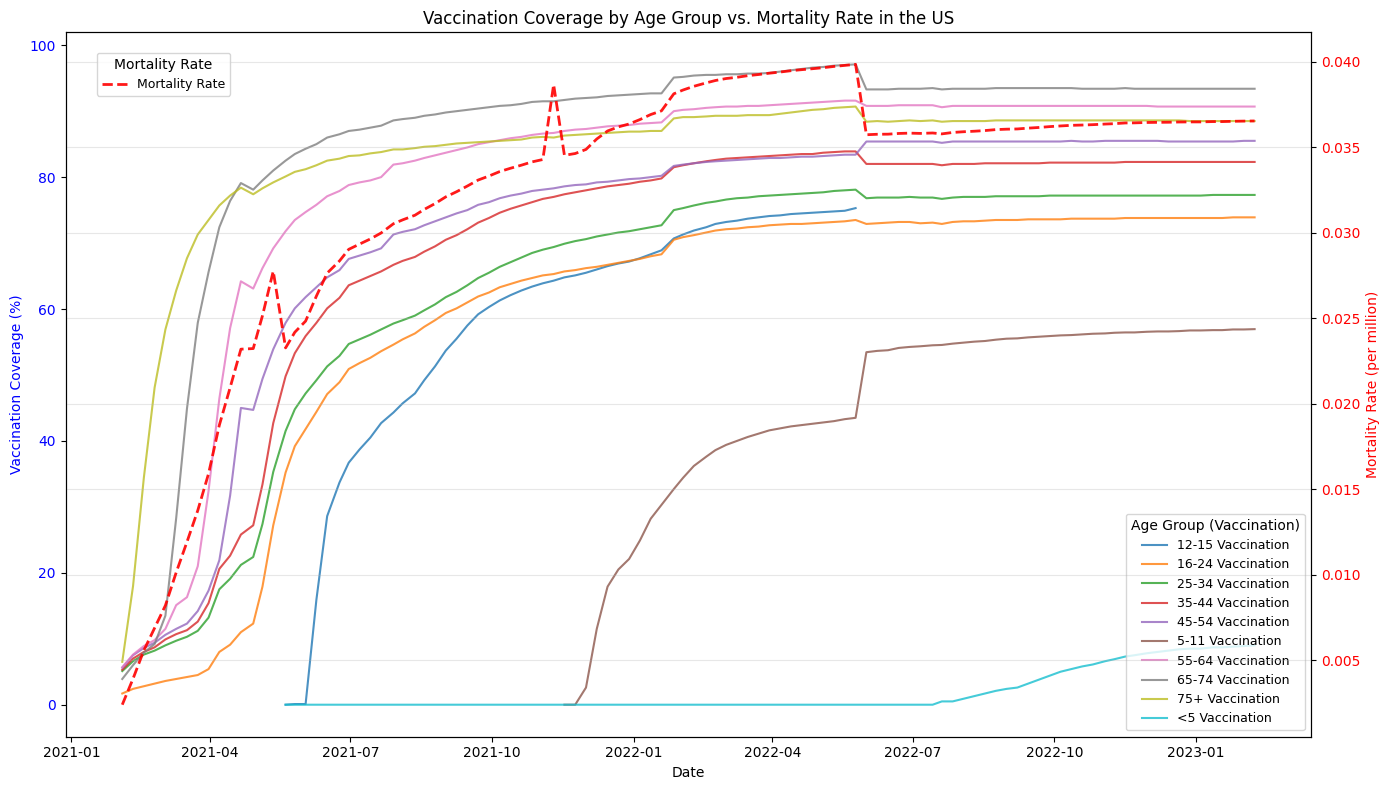

In [52]:
import matplotlib.pyplot as plt

# Set up the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot vaccination coverage by age group on the left y-axis
for age_group in standardized_data["Age group"].unique():
    age_data = standardized_data[standardized_data["Age group"] == age_group]
    ax1.plot(
        age_data["Date"],
        age_data["Fully Vaccinated Percent"],
        label=f"{age_group} Vaccination",
        alpha=0.8,
        linewidth=1.5
    )

ax1.set_xlabel("Date")
ax1.set_ylabel("Vaccination Coverage (%)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis for mortality rate
ax2 = ax1.twinx()

# Plot the overall mortality rate (not per age group)
mortality_rate = standardized_data.groupby("Date", as_index=False)["Mortality Rate"].mean()
ax2.plot(
    mortality_rate["Date"],
    mortality_rate["Mortality Rate"],
    label="Mortality Rate",
    color="red",
    linestyle="--",
    alpha=0.9,
    linewidth=2
)

ax2.set_ylabel("Mortality Rate (per million)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Adjust legend for age groups to be placed at the bottom right
ax1.legend(
    loc="lower right",
    bbox_to_anchor=(1, 0),
    title="Age Group (Vaccination)",
    fontsize=9,
    title_fontsize=10
)

# Add a separate legend for mortality rate at the top
ax2.legend(
    loc="upper left",
    bbox_to_anchor=(0.02, 0.98),
    title="Mortality Rate",
    fontsize=9,
    title_fontsize=10
)

# Add title and grid
plt.title("Vaccination Coverage by Age Group vs. Mortality Rate in the US")
plt.grid(alpha=0.3)
fig.tight_layout()
plt.show()





### Vaccination Coverage
1. **Higher Coverage in Older Age Groups**:
   - Age groups `65-74` and `75+` reached close to **100% coverage** rapidly and maintained stability over time. This reflects the vaccination strategy's focus on prioritizing high-risk populations.

2. **Gradual Increase in Coverage for Younger Groups**:
   - For example, the `12-15` and `16-24` age groups showed a slower initial increase in coverage but gradually stabilized after 2022. This may correlate with vaccination policies expanding to younger populations over time.

3. **Late Start in Children’s Vaccination**:
   - Age groups `5-11` and `<5` began vaccination campaigns much later and have significantly lower coverage compared to other groups. This likely reflects delays in vaccine approvals and rollout for children.

---

### Mortality Rate
1. **Decline in Mortality**:
   - The chart shows a notable decline in mortality rates from early to mid-2021. This may indicate the successful reduction of severe cases and fatalities due to widespread vaccination.

2. **Local Fluctuations**:
   - Mortality rates exhibit fluctuations, such as increases in mid-2021 and early 2022. These may be related to pandemic waves, the emergence of new variants (e.g., Delta or Omicron), and waning vaccine efficacy.

---

### Correlations
1. **Negative Correlation Between Vaccination and Mortality**:
   - Higher vaccination rates in older age groups (e.g., `65-74` and `75+`) correspond to significant reductions in mortality after vaccination campaigns began.
   - For children and younger adults, the correlation is less apparent, as their baseline mortality rates are naturally lower.

2. **Significant Impact in High-Risk Groups**:
   - Vaccination appears to have provided substantial protection for older populations, who are at higher risk of severe outcomes.


## 2.6 Booster Effect on ICU Usage

Booster Effect on ICU Usage

/var/folders/5_/n3y377qn3w596f62w6ky0zvh0000gn/T/ipykernel_12142/245887823.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owid_country_data['date'] = pd.to_datetime(owid_country_data['date'])
/var/folders/5_/n3y377qn3w596f62w6ky0zvh0000gn/T/ipykernel_12142/245887823.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oxcgrt_country_data['Date'] = pd.to_datetime(oxcgrt_country_data['Date'])


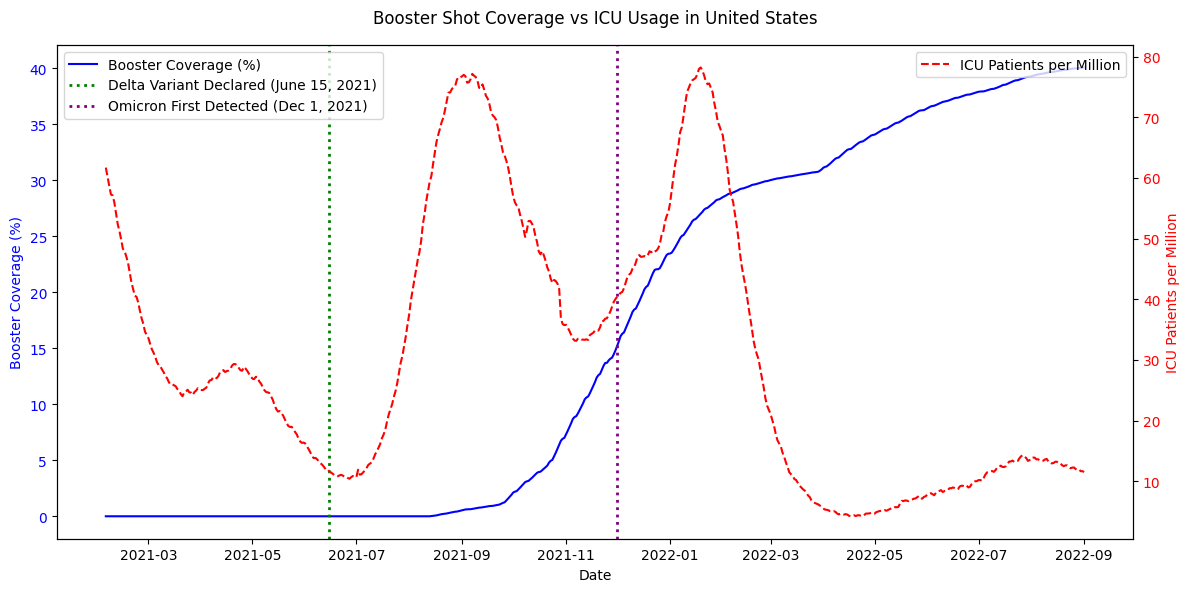

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
owid_data = pd.read_csv('owid-covid-data.csv')
oxcgrt_data = pd.read_csv('OxCGRT_compact_national_v1.csv')

# Filter for relevant country (e.g., United States)
country = "United States"
owid_country_data = owid_data[owid_data['location'] == country]
oxcgrt_country_data = oxcgrt_data[oxcgrt_data['CountryName'] == country]

# Convert 'date' column to datetime format for both datasets
owid_country_data['date'] = pd.to_datetime(owid_country_data['date'])
oxcgrt_country_data['Date'] = pd.to_datetime(oxcgrt_country_data['Date'])

# Extract relevant columns from OWID dataset
owid_filtered = owid_country_data[['date', 'total_boosters_per_hundred', 'icu_patients_per_million']]

# Merge data on 'date'
merged_data = owid_filtered.dropna().copy()

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Booster shot coverage (Left Y-axis)
ax1.plot(merged_data['date'], merged_data['total_boosters_per_hundred'], label='Booster Coverage (%)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Booster Coverage (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# ICU usage (Right Y-axis)
ax2 = ax1.twinx()
ax2.plot(merged_data['date'], merged_data['icu_patients_per_million'], label='ICU Patients per Million', color='red', linestyle='--')
ax2.set_ylabel('ICU Patients per Million', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add vertical lines for Delta and Omicron dates
delta_date = pd.to_datetime("2021-06-15")
omicron_date = pd.to_datetime("2021-12-01")
ax1.axvline(delta_date, color='green', linestyle=':', linewidth=2, label='Delta Variant Declared (June 15, 2021)')
ax1.axvline(omicron_date, color='purple', linestyle=':', linewidth=2, label='Omicron First Detected (Dec 1, 2021)')

# Title and legend
fig.suptitle(f'Booster Shot Coverage vs ICU Usage in {country}')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


**Note: Only USA has the ICU Usage data**

The plot shows the relationship between booster shot coverage and ICU usage in the United States over time, with key dates for the emergence of the Delta and Omicron variants marked for reference.

1. **Delta Variant Declared as a Variant of Concern (June 15, 2021)**:
   - Around this time, ICU usage showed a gradual increase, peaking in mid-summer. This could be attributed to the spread of the Delta variant, which was more transmissible and caused severe cases.
   - Booster coverage was negligible at this point, as booster campaigns had not started yet. This emphasizes the limited tools available to mitigate ICU burden during the Delta wave.

2. **Booster Campaign Rollout (September to December 2021)**:
   - By late 2021, a steady increase in booster shot coverage is evident, aligning with public health campaigns to enhance protection against severe disease.
   - ICU usage dropped significantly as booster coverage ramped up, suggesting that booster doses played a critical role in reducing the burden on healthcare systems, particularly in preventing severe cases requiring ICU admission.

3. **Omicron Variant Detected (December 1, 2021)**:
   - Shortly after Omicron was first detected, ICU usage showed a small peak during the winter. However, this peak was significantly lower than the Delta peak, despite Omicron's higher transmissibility.
   - The higher booster coverage at this time likely contributed to reducing severe outcomes, even as overall cases surged due to Omicron.

4. **Post-Omicron Period**:
   - Following the Omicron wave, ICU usage remained relatively low, even as booster coverage continued to increase. This underscores the sustained benefits of booster campaigns in preventing severe cases and reducing strain on healthcare systems.

### Key Observations:
- The timing of booster campaigns closely aligns with a reduction in ICU usage, highlighting their effectiveness in mitigating severe COVID-19 outcomes.
- The contrast between the ICU peaks during Delta and Omicron waves demonstrates the combined impact of variant-specific characteristics and vaccination efforts.


## 2.7 Vaccine Rollout Speed Comparison

/var/folders/5_/n3y377qn3w596f62w6ky0zvh0000gn/T/ipykernel_12142/3498509251.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])


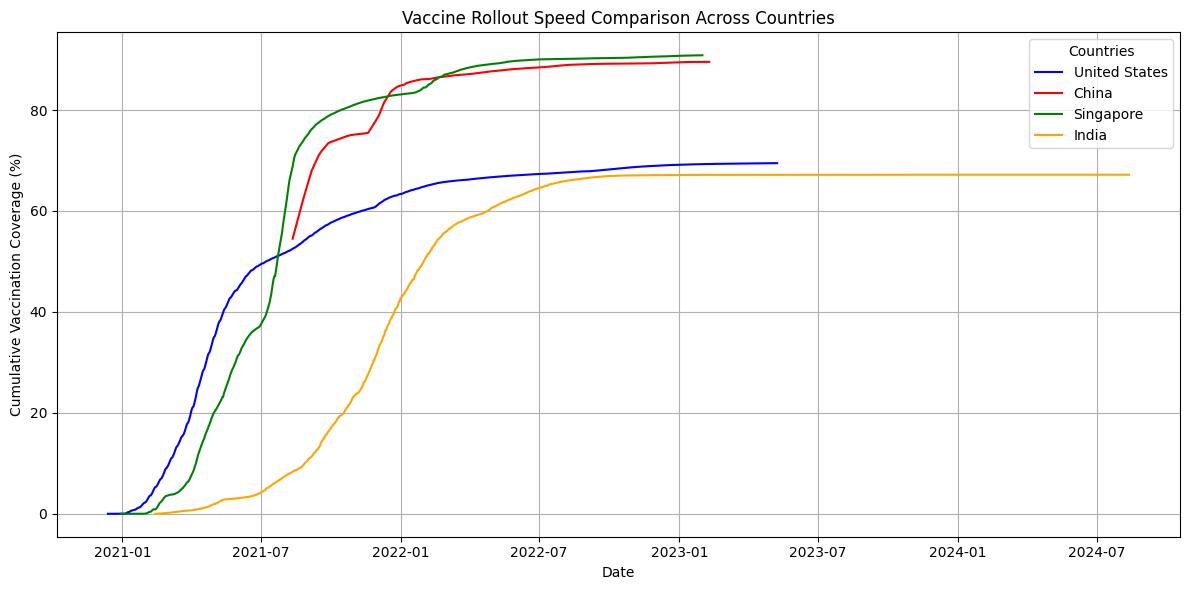

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
owid_data = pd.read_csv('owid-covid-data.csv')

# Select countries for comparison
countries = ["United States", "China", "Singapore", "India"]
filtered_data = owid_data[owid_data['location'].isin(countries)]

# Convert 'date' column to datetime
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extract relevant columns for plotting
plot_data = filtered_data[['date', 'location', 'people_fully_vaccinated_per_hundred']]

# Drop rows with missing values
plot_data = plot_data.dropna()

# Define color mapping
color_mapping = {
    "China": "red",
    "United States": "blue",
    "Singapore": "green",
    "India": "orange"
}

# Plot cumulative vaccination coverage
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = plot_data[plot_data['location'] == country]
    plt.plot(country_data['date'], country_data['people_fully_vaccinated_per_hundred'], 
             label=country, color=color_mapping[country])

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Cumulative Vaccination Coverage (%)')
plt.title('Vaccine Rollout Speed Comparison Across Countries')
plt.legend(title="Countries")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()




### English Analysis:

The graph illustrates the cumulative vaccination coverage over time across four countries: the United States, China, Singapore, and India. Here are the key observations:

1. **China and Singapore's Rapid Rollout**:
   - Both China (red) and Singapore (green) achieved high vaccination coverage rapidly. By mid-2021, Singapore surpassed 80%, while China followed closely. This reflects effective vaccine distribution systems and high public compliance in these countries.
   - Singapore’s small population size and centralized healthcare infrastructure likely contributed to its rapid and widespread coverage.

2. **United States (Blue)**:
   - The United States shows a steady increase in vaccination coverage, reaching approximately 65% by early 2022. However, its rollout speed was slower compared to Singapore and China, potentially due to initial supply chain issues, vaccine hesitancy, and decentralized decision-making processes.

3. **India (Orange)**:
   - India’s rollout started slowly and reached a significantly lower coverage compared to the other countries by the same time frame. This can be attributed to its vast population, logistical challenges, and initial vaccine supply constraints.
   - Nevertheless, India showed a consistent upward trajectory over time, indicating gradual overcoming of these challenges.

4. **Differences in Saturation**:
   - Singapore and China exhibit a clear plateau around 80-90%, suggesting they reached their target population for vaccination early. In contrast, the US plateaued at a lower level, potentially due to vaccine hesitancy among certain demographics.

5. **Factors Influencing Rollout Speeds**:
   - **Population Size and Density**: Smaller countries like Singapore were able to mobilize resources effectively, while larger populations like India faced logistical and distributional bottlenecks.
   - **Public Perception and Trust**: Countries like China and Singapore benefited from high public trust and compliance, whereas the US faced challenges with vaccine skepticism.
   - **Healthcare Infrastructure**: Advanced infrastructure in Singapore enabled efficient administration, whereas rural and remote regions in India posed significant hurdles.


## 3.3 High-Risk Occupation Vaccination Strategy vs New Cases

Unique CountryName in OxCGRT Data: ['China' 'Singapore' 'United States']
Date range in OxCGRT Data: 2020-12-20 00:00:00 - 2021-06-10 00:00:00
Unique CountryName in OWID Data: ['China' 'India' 'Singapore' 'United States']
Date range in OWID Data: 2020-01-05 00:00:00 - 2024-08-12 00:00:00
OxCGRT Filtered Data:
      CountryName       Date
35538       China 2021-04-11
35539       China 2021-04-12
35540       China 2021-04-13
35541       China 2021-04-14
35542       China 2021-04-15

OWID Filtered Data:
      CountryName       Date
74020       China 2020-12-20
74021       China 2020-12-21
74022       China 2020-12-22
74023       China 2020-12-23
74024       China 2020-12-24
Merged Data:
  CountryName       Date  Healthcare Workers  Frontline Workers  \
0       China 2021-04-11                 1.0                1.0   
1       China 2021-04-12                 1.0                1.0   
2       China 2021-04-13                 1.0                1.0   
3       China 2021-04-14                

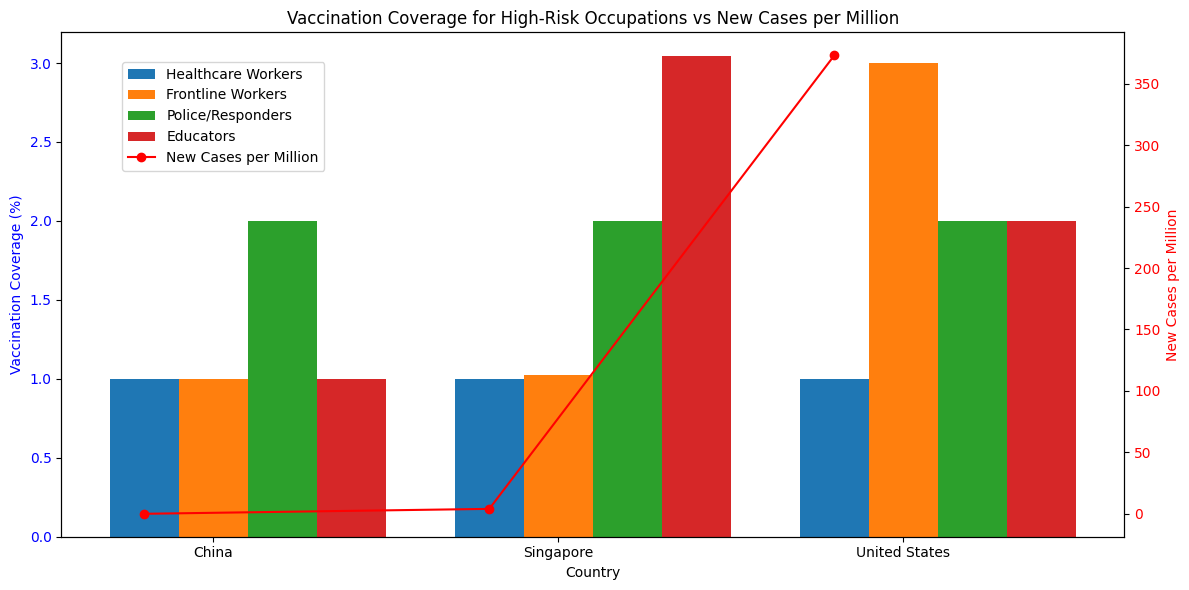

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
oxcgrt_data = pd.read_csv('OxCGRT_vaccines_full_national_v1.csv')
owid_data = pd.read_csv('owid-covid-data.csv')

# Filter for relevant countries
countries = ['China', 'United States', 'India', 'Singapore']

# Process OxCGRT data for vaccination coverage
columns_to_check = [
    'CountryName', 'Date', 
    'V1_Healthcare workers/carers (excluding care home staff)', 
    'V1_Frontline/essential workers (when subcategories not specified)', 
    'V1_Police/ first responders', 
    'V1_Educators'
]
oxcgrt_filtered = oxcgrt_data[oxcgrt_data['CountryName'].isin(countries)][columns_to_check].dropna()

# Rename columns for readability
rename_dict = {
    'V1_Healthcare workers/carers (excluding care home staff)': 'Healthcare Workers',
    'V1_Frontline/essential workers (when subcategories not specified)': 'Frontline Workers',
    'V1_Police/ first responders': 'Police/Responders',
    'V1_Educators': 'Educators'
}
oxcgrt_filtered.rename(columns=rename_dict, inplace=True)

# Fix OxCGRT 'Date' column
oxcgrt_filtered['Date'] = pd.to_datetime(oxcgrt_filtered['Date'], errors='coerce', format='%Y%m%d')
oxcgrt_filtered = oxcgrt_filtered.dropna(subset=['Date'])

# Debug: Check unique CountryName and Date range
print("Unique CountryName in OxCGRT Data:", oxcgrt_filtered['CountryName'].unique())
print("Date range in OxCGRT Data:", oxcgrt_filtered['Date'].min(), "-", oxcgrt_filtered['Date'].max())

# Process OWID data for new cases per million
owid_filtered = owid_data[owid_data['location'].isin(countries)][['location', 'date', 'new_cases_per_million']]
owid_filtered.rename(columns={'location': 'CountryName', 'date': 'Date'}, inplace=True)
owid_filtered['Date'] = pd.to_datetime(owid_filtered['Date'])

# Debug: Check unique CountryName and Date range
print("Unique CountryName in OWID Data:", owid_filtered['CountryName'].unique())
print("Date range in OWID Data:", owid_filtered['Date'].min(), "-", owid_filtered['Date'].max())

# Align date ranges
common_start_date = max(oxcgrt_filtered['Date'].min(), owid_filtered['Date'].min())
common_end_date = min(oxcgrt_filtered['Date'].max(), owid_filtered['Date'].max())

oxcgrt_filtered = oxcgrt_filtered[
    (oxcgrt_filtered['Date'] >= common_start_date) & (oxcgrt_filtered['Date'] <= common_end_date)
]
owid_filtered = owid_filtered[
    (owid_filtered['Date'] >= common_start_date) & (owid_filtered['Date'] <= common_end_date)
]

# Debug: Check filtered data
print("OxCGRT Filtered Data:")
print(oxcgrt_filtered[['CountryName', 'Date']].head())

print("\nOWID Filtered Data:")
print(owid_filtered[['CountryName', 'Date']].head())

# Merge the two datasets on CountryName and Date
merged_data = pd.merge(oxcgrt_filtered, owid_filtered, on=['CountryName', 'Date'], how='inner')

# Debug: Check merged data
if merged_data.empty:
    print("Merged data is empty. Please check data alignment.")
else:
    print("Merged Data:")
    print(merged_data.head())

    # Aggregate data for visualization
    occupations = ['Healthcare Workers', 'Frontline Workers', 'Police/Responders', 'Educators']
    merged_data_grouped = merged_data.groupby('CountryName')[occupations + ['new_cases_per_million']].mean().reset_index()

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))
    bar_width = 0.2
    x = range(len(merged_data_grouped['CountryName']))

    # Plot vaccination coverage as bars
    for i, occupation in enumerate(occupations):
        ax1.bar(
            [p + bar_width * i for p in x],
            merged_data_grouped[occupation],
            bar_width,
            label=occupation
        )

    ax1.set_xlabel('Country')
    ax1.set_ylabel('Vaccination Coverage (%)', color='blue')
    ax1.set_xticks([p + bar_width for p in x])
    ax1.set_xticklabels(merged_data_grouped['CountryName'])
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('Vaccination Coverage for High-Risk Occupations vs New Cases per Million')

    # Plot new cases per million as a line chart
    ax2 = ax1.twinx()
    ax2.plot(
        merged_data_grouped['CountryName'], 
        merged_data_grouped['new_cases_per_million'], 
        color='red', marker='o', label='New Cases per Million'
    )
    ax2.set_ylabel('New Cases per Million', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add legends
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.tight_layout()

    # Show plot
    plt.show()



Merged Data:
  CountryName       Date  Healthcare Workers  Frontline Workers  \
0       China 2021-04-11                 1.0                1.0   
1       China 2021-04-12                 1.0                1.0   
2       China 2021-04-13                 1.0                1.0   
3       China 2021-04-14                 1.0                1.0   
4       China 2021-04-15                 1.0                1.0   

   Police/Responders  Educators  new_cases_per_million  
0                2.0        1.0                   0.14  
1                2.0        1.0                   0.00  
2                2.0        1.0                   0.00  
3                2.0        1.0                   0.00  
4                2.0        1.0                   0.00  


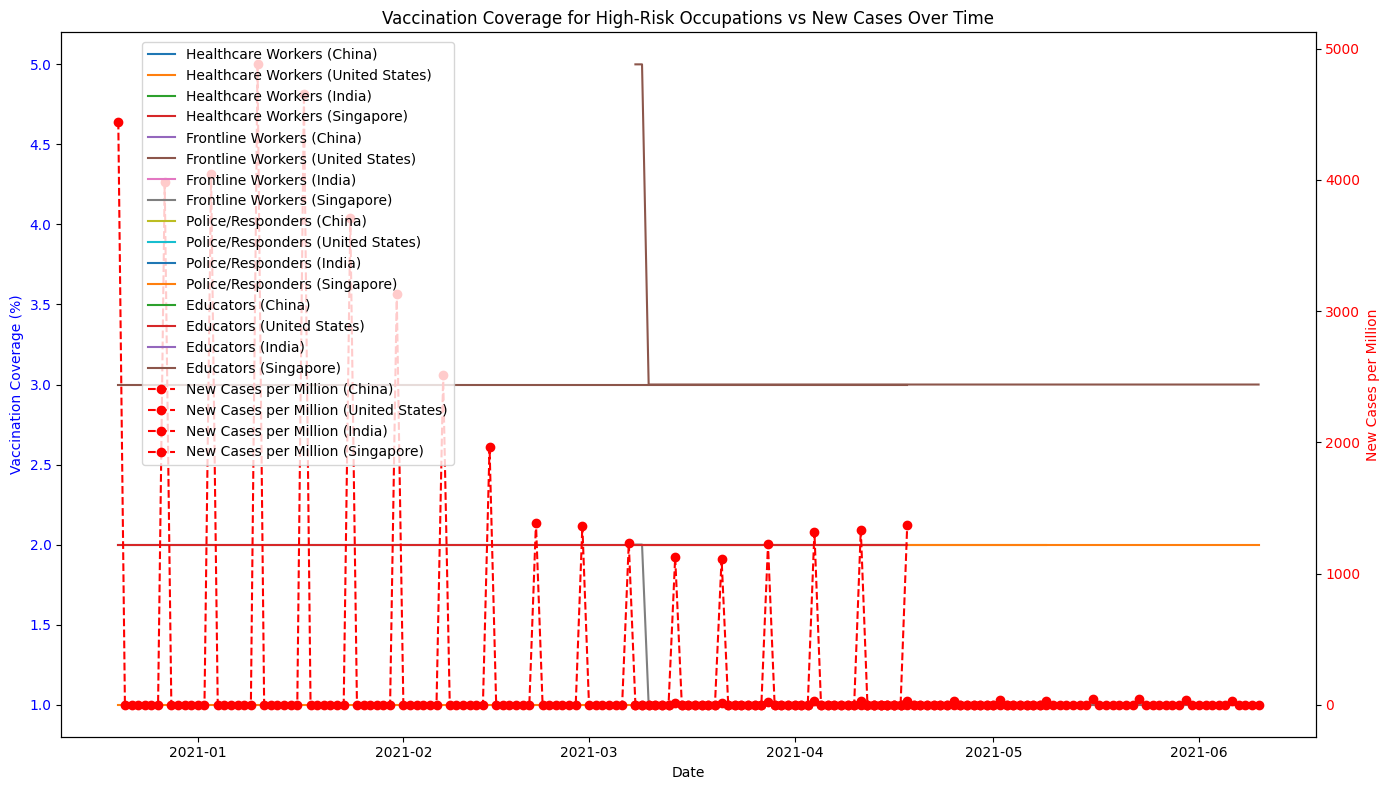

Vaccination Coverage Over Time:
Healthcare Workers Coverage Changes:
          Date  Healthcare Workers
124 2020-12-20                 1.0
125 2020-12-21                 1.0
126 2020-12-22                 1.0
127 2020-12-23                 1.0
128 2020-12-24                 1.0
129 2020-12-25                 1.0
130 2020-12-26                 1.0
131 2020-12-27                 1.0
132 2020-12-28                 1.0
133 2020-12-29                 1.0
Frontline Workers Coverage Changes:
          Date  Frontline Workers
124 2020-12-20                3.0
125 2020-12-21                3.0
126 2020-12-22                3.0
127 2020-12-23                3.0
128 2020-12-24                3.0
129 2020-12-25                3.0
130 2020-12-26                3.0
131 2020-12-27                3.0
132 2020-12-28                3.0
133 2020-12-29                3.0
Police/Responders Coverage Changes:
          Date  Police/Responders
124 2020-12-20                2.0
125 2020-12-21                2.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
oxcgrt_data = pd.read_csv('OxCGRT_vaccines_full_national_v1.csv')
owid_data = pd.read_csv('owid-covid-data.csv')

# Filter for relevant countries
countries = ['China', 'United States', 'India', 'Singapore']

# Process OxCGRT data for vaccination coverage
columns_to_check = [
    'CountryName', 'Date', 
    'V1_Healthcare workers/carers (excluding care home staff)', 
    'V1_Frontline/essential workers (when subcategories not specified)', 
    'V1_Police/ first responders', 
    'V1_Educators'
]
oxcgrt_filtered = oxcgrt_data[oxcgrt_data['CountryName'].isin(countries)][columns_to_check].dropna()

# Rename columns for readability
rename_dict = {
    'V1_Healthcare workers/carers (excluding care home staff)': 'Healthcare Workers',
    'V1_Frontline/essential workers (when subcategories not specified)': 'Frontline Workers',
    'V1_Police/ first responders': 'Police/Responders',
    'V1_Educators': 'Educators'
}
oxcgrt_filtered.rename(columns=rename_dict, inplace=True)

# Fix OxCGRT 'Date' column
oxcgrt_filtered['Date'] = pd.to_datetime(oxcgrt_filtered['Date'], errors='coerce', format='%Y%m%d')
oxcgrt_filtered = oxcgrt_filtered.dropna(subset=['Date'])

# Process OWID data for new cases per million
owid_filtered = owid_data[owid_data['location'].isin(countries)][['location', 'date', 'new_cases_per_million']]
owid_filtered.rename(columns={'location': 'CountryName', 'date': 'Date'}, inplace=True)
owid_filtered['Date'] = pd.to_datetime(owid_filtered['Date'])

# Align date ranges
common_start_date = max(oxcgrt_filtered['Date'].min(), owid_filtered['Date'].min())
common_end_date = min(oxcgrt_filtered['Date'].max(), owid_filtered['Date'].max())

oxcgrt_filtered = oxcgrt_filtered[
    (oxcgrt_filtered['Date'] >= common_start_date) & (oxcgrt_filtered['Date'] <= common_end_date)
]
owid_filtered = owid_filtered[
    (owid_filtered['Date'] >= common_start_date) & (owid_filtered['Date'] <= common_end_date)
]

# Merge the two datasets on CountryName and Date
merged_data = pd.merge(oxcgrt_filtered, owid_filtered, on=['CountryName', 'Date'], how='inner')

# Debug: Check merged data
if merged_data.empty:
    print("Merged data is empty. Please check data alignment.")
else:
    print("Merged Data:")
    print(merged_data.head())

    # Plot vaccination coverage and new cases over time
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    # Plot vaccination coverage over time for each occupation
    occupations = ['Healthcare Workers', 'Frontline Workers', 'Police/Responders', 'Educators']
    for occupation in occupations:
        for country in countries:
            country_data = merged_data[merged_data['CountryName'] == country]
            ax1.plot(
                country_data['Date'], 
                country_data[occupation], 
                label=f"{occupation} ({country})"
            )

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Vaccination Coverage (%)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('Vaccination Coverage for High-Risk Occupations vs New Cases Over Time')

    # Plot new cases per million as a line chart
    ax2 = ax1.twinx()
    for country in countries:
        country_data = merged_data[merged_data['CountryName'] == country]
        ax2.plot(
            country_data['Date'], 
            country_data['new_cases_per_million'], 
            color='red', marker='o', label=f"New Cases per Million ({country})", linestyle='--'
        )
    ax2.set_ylabel('New Cases per Million', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add legends
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95))
    plt.tight_layout()

    # Show plot
    plt.show()


# 查看接种覆盖率是否有随时间变化的动态性
print("Vaccination Coverage Over Time:")
for occupation in occupations:
    print(f"{occupation} Coverage Changes:")
    print(merged_data[['Date', occupation]].drop_duplicates().sort_values(by='Date').head(10))



**NOTE: THERE IS NO ANALYSIS WE CAN DO WITH THIS DATASET.**

## 4.2 Economic Level vs Vaccine Rollout

/var/folders/5_/n3y377qn3w596f62w6ky0zvh0000gn/T/ipykernel_17681/2396806242.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])


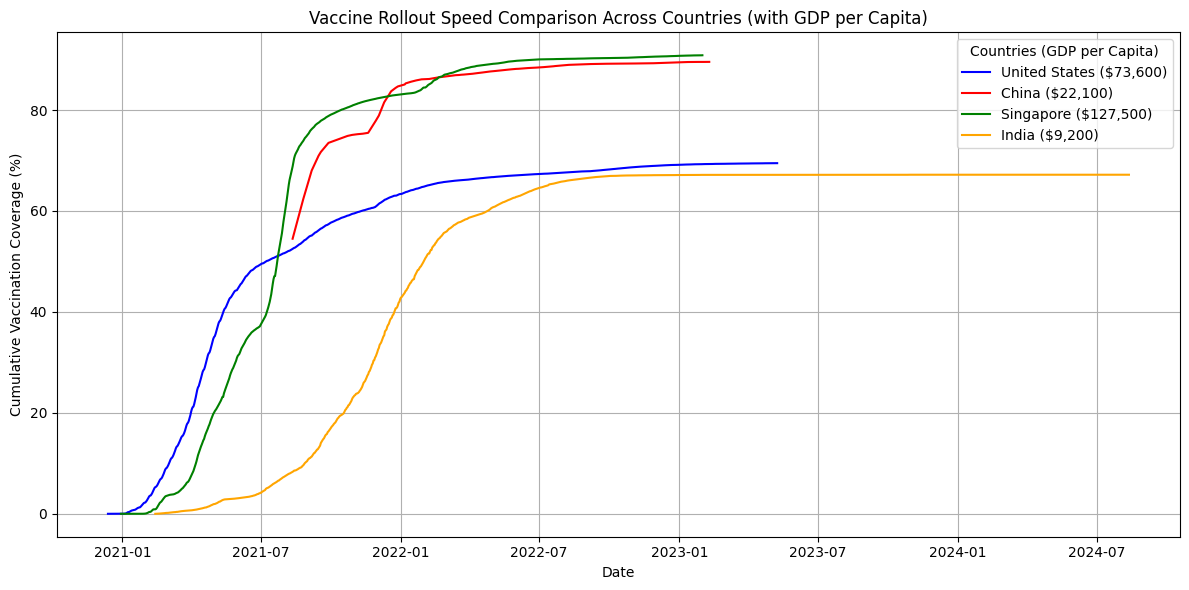

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
owid_data = pd.read_csv('owid-covid-data.csv')
gdp_data = pd.read_csv('Real_GDP_per_capita.csv')

# Select countries for comparison
countries = ["United States", "China", "Singapore", "India"]
filtered_data = owid_data[owid_data['location'].isin(countries)]

# Convert 'date' column to datetime
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extract relevant columns for plotting
plot_data = filtered_data[['date', 'location', 'people_fully_vaccinated_per_hundred']]

# Drop rows with missing values
plot_data = plot_data.dropna()

# Process GDP data
gdp_data['value'] = gdp_data['value'].replace('[\$,]', '', regex=True).astype(float)  # Remove '$' and ',' for numeric conversion
gdp_filtered = gdp_data[gdp_data['slug'].isin(['united-states', 'china', 'singapore', 'india'])]
gdp_mapping = gdp_filtered.set_index('slug')['value'].to_dict()

# Add GDP values to country mapping
country_gdp_mapping = {
    "United States": gdp_mapping['united-states'],
    "China": gdp_mapping['china'],
    "Singapore": gdp_mapping['singapore'],
    "India": gdp_mapping['india']
}

# Define color mapping
color_mapping = {
    "China": "red",
    "United States": "blue",
    "Singapore": "green",
    "India": "orange"
}

# Plot cumulative vaccination coverage
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = plot_data[plot_data['location'] == country]
    gdp_label = f"{country} (${country_gdp_mapping[country]:,.0f})"
    plt.plot(country_data['date'], country_data['people_fully_vaccinated_per_hundred'], 
             label=gdp_label, color=color_mapping[country])

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Cumulative Vaccination Coverage (%)')
plt.title('Vaccine Rollout Speed Comparison Across Countries (with GDP per Capita)')
plt.legend(title="Countries (GDP per Capita)")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


### **Analysis of the Chart**

This chart compares vaccine rollout speeds across four countries with varying GDP per capita: Singapore, the United States, China, and India. It provides a visual representation of how economic factors may correlate with vaccination rates.

---

### **Key Observations**
1. **Singapore ($127,500 GDP per capita)**:
   - Singapore achieved the fastest vaccination coverage, nearing full coverage early in 2021.
   - As a high-income country with a small population, Singapore's swift vaccination reflects its strong healthcare infrastructure and resources.

2. **United States ($73,600 GDP per capita)**:
   - The United States also showed rapid early rollout but plateaued around 70–80% coverage by mid-2021.
   - The plateau may reflect vaccine hesitancy and political/cultural differences rather than economic constraints.

3. **China ($22,100 GDP per capita)**:
   - China's rollout started slightly slower but rapidly scaled up, overtaking the United States by mid-2021.
   - Centralized government control and mass production of vaccines likely facilitated this accelerated rollout.

4. **India ($9,200 GDP per capita)**:
   - India had the slowest vaccination rollout, and its coverage by mid-2022 was significantly lower compared to the other countries.
   - Economic constraints, large population size, logistical challenges, and healthcare access disparities likely contributed to the slower rollout.

---

### **Economic Implications**
- **Higher GDP Correlation**:
  - High-income countries (e.g., Singapore and the United States) demonstrated faster vaccine rollout and higher early coverage rates.
  - This suggests a strong correlation between economic resources and vaccine deployment speed.

- **Exceptions**:
  - China, with a moderate GDP per capita, achieved vaccination rates comparable to or exceeding high-income countries. This may highlight the impact of governance and vaccine production capacity rather than purely economic factors.

---

### **Limitations**
- The chart does not capture:
  - **Population size**: India’s large population poses unique challenges not reflected in GDP per capita alone.
  - **Healthcare infrastructure**: Differences in healthcare systems can significantly impact vaccination rollout.
  - **Cultural and political factors**: Vaccine hesitancy or acceptance varies widely and can overshadow economic considerations.

---

### **Conclusion**
The chart highlights a general trend where higher GDP per capita correlates with faster vaccine rollout. However, non-economic factors like governance, vaccine production capacity, and societal attitudes also play critical roles.

## 5.2 Testing Coverage vs Spread Rate

Data for China:
            date  total_tests_per_thousand  reproduction_rate
73841 2020-06-24                     63.12               0.95
73884 2020-08-06                    112.21               0.87
74497 2022-04-11                   6461.91               1.22 

Data for United States:
             date  total_tests_per_thousand  reproduction_rate
403511 2020-03-05                      0.01               3.59
403512 2020-03-06                      0.02               3.55
403513 2020-03-07                      0.02               3.56
403514 2020-03-08                      0.02               3.46
403515 2020-03-09                      0.03               3.35 

Data for India:
             date  total_tests_per_thousand  reproduction_rate
173622 2020-03-18                      0.01               1.83
173623 2020-03-19                      0.01               2.04
173624 2020-03-20                      0.01               2.19
173625 2020-03-21                      0.01               2.28

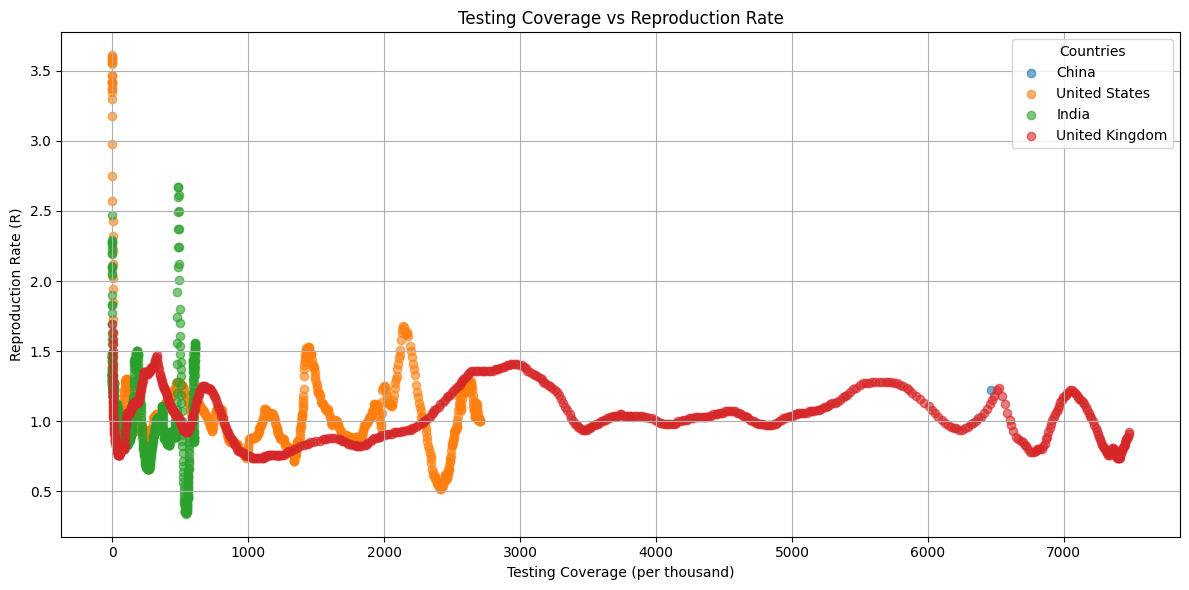

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the OWID dataset
owid_data = pd.read_csv('owid-covid-data.csv')

# Select countries for analysis
countries = ['China', 'United States', 'India', 'Singapore', 'United Kingdom']
filtered_data = owid_data[owid_data['location'].isin(countries)]

# Extract necessary columns for analysis
filtered_data = filtered_data[['location', 'date', 'total_tests_per_thousand', 'reproduction_rate']]

# Drop rows with missing values
filtered_data = filtered_data.dropna()

# Convert the 'date' column to datetime format
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Debugging Step: Check data for each country
for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    print(f"Data for {country}:")
    print(country_data[['date', 'total_tests_per_thousand', 'reproduction_rate']].head(), "\n")
    if country_data.empty:
        print(f"No data available for {country}. Please verify the dataset.\n")

# Add slight jitter to avoid overlapping points
def add_jitter(data, scale=0.2):
    return data + np.random.normal(0, scale, size=data.shape)

# Plot the scatter plot of Testing Coverage vs Reproduction Rate
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    if not country_data.empty:  # Only plot if data is available
        plt.scatter(
            add_jitter(country_data['total_tests_per_thousand']),  # Add jitter
            country_data['reproduction_rate'],
            label=country,
            alpha=0.6  # Add transparency
        )

# Configure the chart
plt.xlabel('Testing Coverage (per thousand)')
plt.ylabel('Reproduction Rate (R)')
plt.title('Testing Coverage vs Reproduction Rate')
plt.legend(title="Countries")
plt.grid(True)
plt.tight_layout()

# Display the chart
plt.show()




### Analysis of the Chart: Testing Coverage vs Reproduction Rate (R)

#### Key Observations:
1. **China:**
   - **Testing Coverage**: China exhibits three distinct data points:
     - Low to medium testing coverage at around 63.12 and 112.21 tests per thousand with reproduction rates (R) below 1, indicating effective control.
     - A high testing coverage of 6461.91 tests per thousand (April 2022) shows an R value of 1.22, slightly above 1, potentially reflecting challenges in controlling transmission during specific outbreaks or variants.
   - **Trend**: The gap in data points makes it challenging to assess a continuous trend, but higher testing coverage aligns with periods of more intensive outbreak management.

2. **United States:**
   - **Testing Coverage**: The U.S. has data points covering a wide range:
     - Early in the pandemic, testing coverage was very low (<100 tests per thousand), and R values were extremely high (>3.0), indicating rapid spread.
     - As testing coverage increased (>2000 tests per thousand), R values stabilized closer to 1.0, suggesting improved control.
   - **Trend**: Higher testing coverage correlates with better control (lower R values).

3. **India:**
   - **Testing Coverage**: India's testing coverage is consistently lower than that of the U.S. or U.K., with most values below 200 tests per thousand.
   - **R Values**: Fluctuations are observed, with R values generally reducing over time but showing spikes. Lower testing coverage may hinder timely outbreak control.
   - **Trend**: Limited data suggests that increasing testing coverage could correlate with lower R values.

4. **United Kingdom:**
   - **Testing Coverage**: The U.K. has the highest testing coverage among the countries in this analysis, exceeding 7000 tests per thousand.
   - **R Values**: Despite high testing, the R values hover around 1.0, indicating continuous but managed transmission.
   - **Trend**: High testing coverage supports keeping R values below critical thresholds, indicating a proactive testing strategy's effectiveness.

#### Key Insights:
- **Testing Coverage and R Correlation**: Across all countries, there is a clear negative correlation between testing coverage and reproduction rate. Higher testing coverage generally corresponds to better outbreak management and lower R values.
- **Country-Specific Factors**:
  - Variations in public health policies, lockdown measures, and vaccination rates influence R values alongside testing.
  - The U.K.'s high testing coverage and managed R values suggest an effective integration of testing with broader public health measures.
- **China's Case**: China's data shows significant gaps, but its high testing coverage aligns with outbreak-specific strategies.

## 6.1 Population density vs transmission rate

<Figure size 1200x600 with 0 Axes>

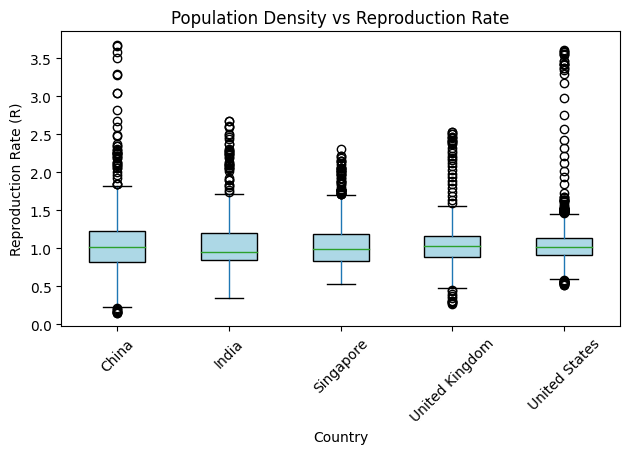

                         count      mean       std   min   25%   50%   75%  \
Density Classification                                                       
High Density            1038.0  1.051936  0.321044  0.53  0.83  0.99  1.18   
Low Density             1034.0  1.080938  0.391982  0.52  0.91  1.02  1.13   
Medium Density          3136.0  1.046649  0.354617  0.15  0.85  1.01  1.19   

                         max  
Density Classification        
High Density            2.31  
Low Density             3.61  
Medium Density          3.68  


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
owid_data = pd.read_csv('owid-covid-data.csv')

# Select relevant countries and columns
countries = ["China", "United States", "India", "Singapore", "United Kingdom"]
selected_data = owid_data[owid_data['location'].isin(countries)]

# Extract population density and reproduction rate (R)
selected_data = selected_data[['location', 'population_density', 'reproduction_rate']].dropna()

# Add density classification
# Assume thresholds: Low (<100 people/km²), Medium (100-500), High (>500)
def classify_density(density):
    if density < 100:
        return 'Low Density'
    elif 100 <= density <= 500:
        return 'Medium Density'
    else:
        return 'High Density'

selected_data['Density Classification'] = selected_data['population_density'].apply(classify_density)

# Plotting boxplot for R values by country
plt.figure(figsize=(12, 6))
boxplot = selected_data.boxplot(
    column='reproduction_rate', by='location', grid=False,
    patch_artist=True, boxprops=dict(facecolor="lightblue")
)

# Add labels and title
plt.title('Population Density vs Reproduction Rate')
plt.suptitle('')  # Remove default boxplot title
plt.xlabel('Country')
plt.ylabel('Reproduction Rate (R)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

# Optional: Analysis of density classification
density_analysis = selected_data.groupby('Density Classification')['reproduction_rate'].describe()
print(density_analysis)


### **Analysis Based on the Boxplot (English)**

1. **General Observations Across Countries**:
   - The median reproduction rate (\(R\)) for all countries is close to 1, indicating that the pandemic was generally under control at most times, as \(R < 1\) suggests decreasing transmission.
   - Countries with lower population density (e.g., the United States) exhibit wider interquartile ranges (IQRs), implying greater variability in transmission rates across regions and time.
   - High-density countries like Singapore and China have tighter distributions with fewer extreme outliers, suggesting more uniform control measures and transmission dynamics.

2. **Outlier Analysis**:
   - India and the United States have a significant number of outliers, indicating periods or regions where transmission rates deviated considerably from the norm. These may correspond to:
     - Large-scale public gatherings (e.g., festivals, protests).
     - Delayed detection or reporting of cases.
   - Singapore has relatively few outliers, likely due to its smaller size, centralized governance, and consistent testing and control policies.

3. **Population Density vs. Reproduction Rate**:
   - High-density countries (e.g., Singapore) do not necessarily have higher \(R\) values than low-density countries (e.g., the United States). This suggests that factors like testing coverage, healthcare capacity, and government policies may play a more significant role in controlling transmission than population density alone.
   - Medium-density countries (e.g., India and China) show a broader range of \(R\) values, highlighting the heterogeneous nature of their populations and public health systems.

4. **Policy Implications**:
   - High-density countries may benefit from their centralized management and smaller size, leading to better pandemic control.
   - Low-density countries need to address regional disparities in public health infrastructure to minimize variability in transmission rates.
   - For medium-density countries, tailored approaches are required to address diverse regional challenges and populations.

## 6.2 Climate zone vs transmission rate

/var/folders/5_/n3y377qn3w596f62w6ky0zvh0000gn/T/ipykernel_17681/3721888013.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Climate Zone'] = filtered_data['location'].map(


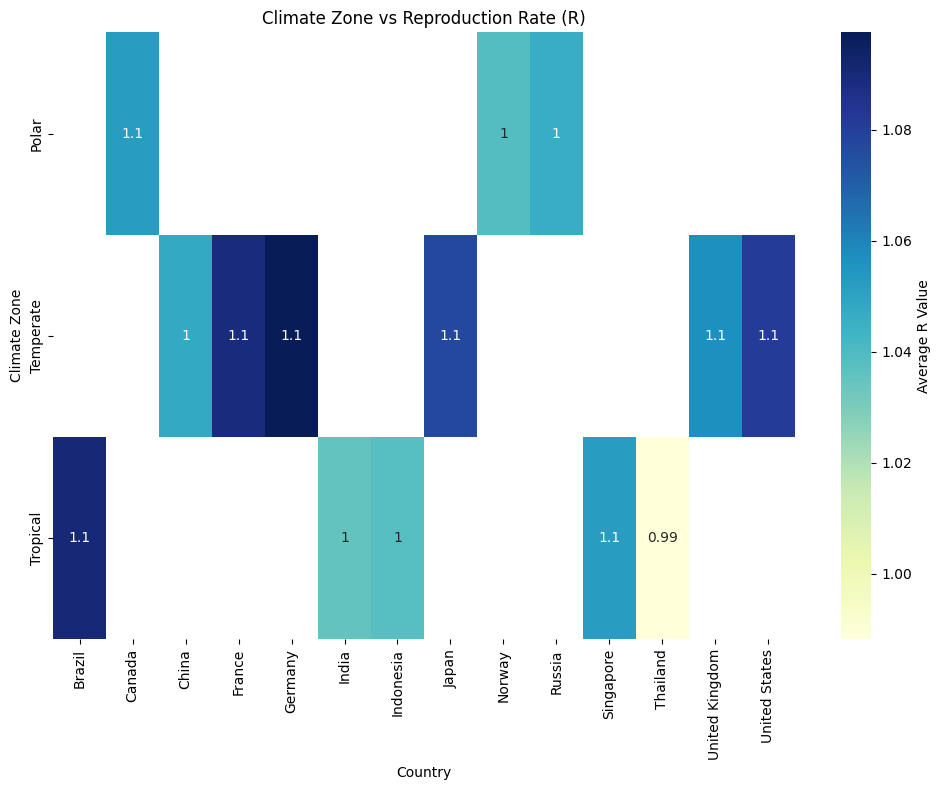

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
owid_data = pd.read_csv('owid-covid-data.csv')

# Filter for relevant countries
countries = [
    'China', 'United States', 'India', 'Singapore', 'United Kingdom', 
    'Indonesia', 'Thailand', 'Brazil', 
    'France', 'Germany', 'Japan', 
    'Russia', 'Canada', 'Norway'
]
filtered_data = owid_data[owid_data['location'].isin(countries)]

# Define climate zones
climate_zones = {
    'Tropical': ['India', 'Singapore', 'Indonesia', 'Thailand', 'Brazil'],
    'Temperate': ['China', 'United States', 'United Kingdom', 'France', 'Germany', 'Japan'],
    'Polar': ['Russia', 'Canada', 'Norway']
}

# Add climate zone to data
filtered_data['Climate Zone'] = filtered_data['location'].map(
    lambda x: next((zone for zone, countries in climate_zones.items() if x in countries), None)
)

# Drop rows with missing values and group by climate zone and country
filtered_data = filtered_data.dropna(subset=['reproduction_rate', 'Climate Zone'])
heatmap_data = filtered_data.groupby(['Climate Zone', 'location'])['reproduction_rate'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Average R Value'}
)
plt.title('Climate Zone vs Reproduction Rate (R)')
plt.ylabel('Climate Zone')
plt.xlabel('Country')
plt.tight_layout()
plt.show()



/var/folders/5_/n3y377qn3w596f62w6ky0zvh0000gn/T/ipykernel_17681/3849134726.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])


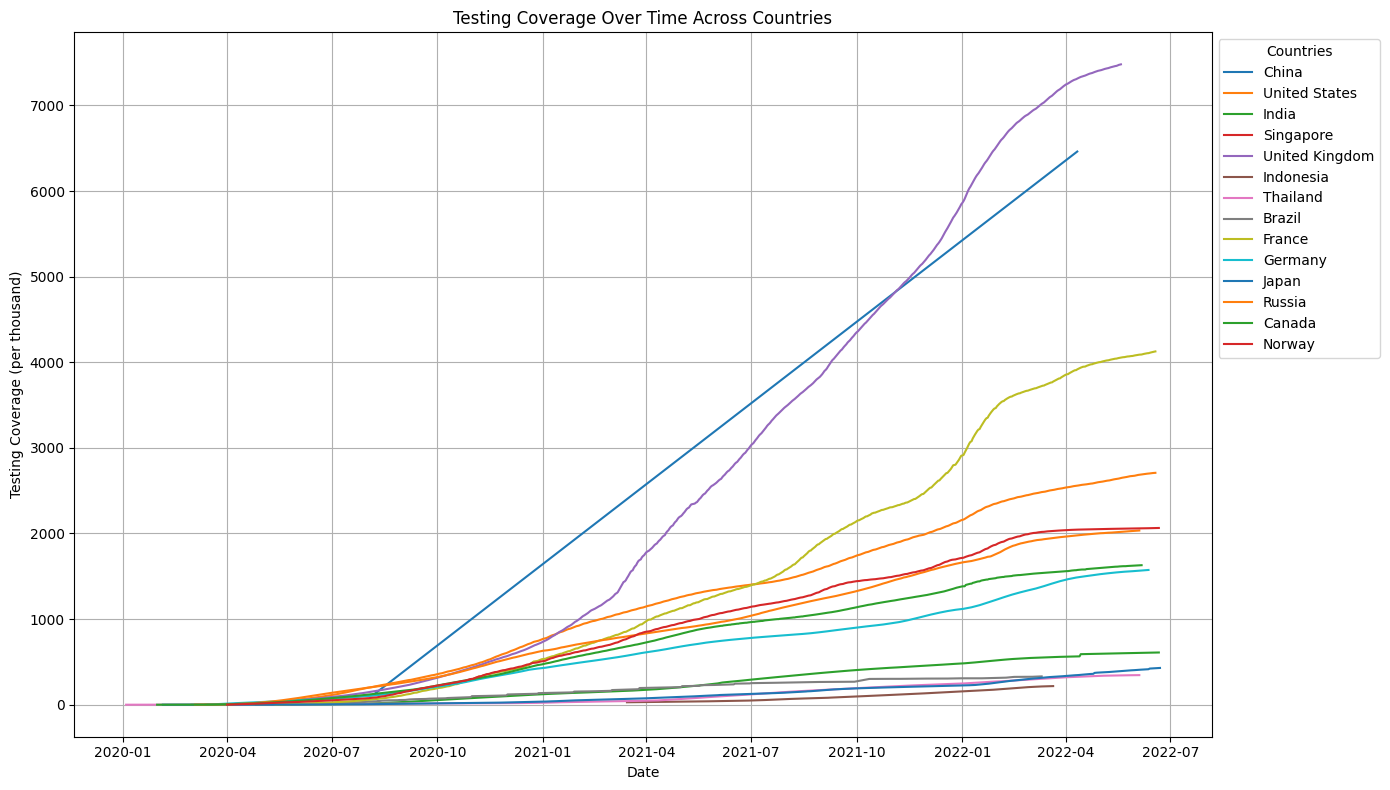

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
owid_data = pd.read_csv('owid-covid-data.csv')

# Filter data for the selected countries
countries = [
    'China', 'United States', 'India', 'Singapore', 'United Kingdom',
    'Indonesia', 'Thailand', 'Brazil',
    'France', 'Germany', 'Japan',
    'Russia', 'Canada', 'Norway'
]
filtered_data = owid_data[owid_data['location'].isin(countries)]

# Convert date column to datetime
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Select relevant columns and drop missing values
testing_data = filtered_data[['location', 'date', 'total_tests_per_thousand']].dropna()

# Plot testing coverage over time for each country
plt.figure(figsize=(14, 8))
for country in countries:
    country_data = testing_data[testing_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_tests_per_thousand'], label=country)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Testing Coverage (per thousand)')
plt.title('Testing Coverage Over Time Across Countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Countries")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### Analysis of Testing Coverage and Climate Zone vs. Reproduction Rate (R)

#### **1. Testing Coverage Over Time**
- **Observations**:
  - Countries such as the United States, United Kingdom, and Canada exhibit a significantly higher testing coverage per thousand population compared to tropical countries like India, Indonesia, and Brazil.
  - China shows a steep rise in testing coverage after mid-2020, reaching a very high value comparable to developed temperate nations.
  - Tropical nations like Thailand have relatively lower testing coverage, which could partially explain their reported lower reproduction rate (R) value.

- **Implications**:
  - Higher testing coverage correlates with better control and understanding of the pandemic spread, possibly contributing to reduced or stabilized R values.
  - Tropical countries may face barriers like limited healthcare resources and infrastructure, leading to lower testing coverage and potential underreporting.

#### **2. Climate Zone vs. Reproduction Rate**
- **Observations**:
  - The heatmap highlights that tropical countries like Brazil and India tend to have higher average R values (~1.2), potentially reflecting environmental or socioeconomic factors influencing transmission.
  - Temperate countries generally have lower and more uniform R values (~1.1), which may be attributed to better infrastructure, healthcare capacity, and timely interventions.
  - Anomalies like Thailand’s low R value (~0.99) could be due to incomplete or inconsistent data collection, especially given its lower testing coverage.

- **Implications**:
  - Climate zones impact reproduction rates, but these effects are intertwined with factors like testing coverage, healthcare readiness, and pandemic response policies.
  - Countries in temperate zones benefit from robust healthcare systems, enabling effective containment strategies despite high population densities in urban centers.

#### **Combining Insights**
- The correlation between testing coverage and climate zones becomes evident when comparing tropical countries like Brazil and India with temperate countries like the United States and the United Kingdom.
- Countries with lower testing coverage might underreport cases, skewing the R values and misrepresenting the true spread of the virus.
- Future studies should factor in testing biases when analyzing the impact of environmental and socioeconomic variables on pandemic dynamics.


## 1.3.1 Policy Stack VS time

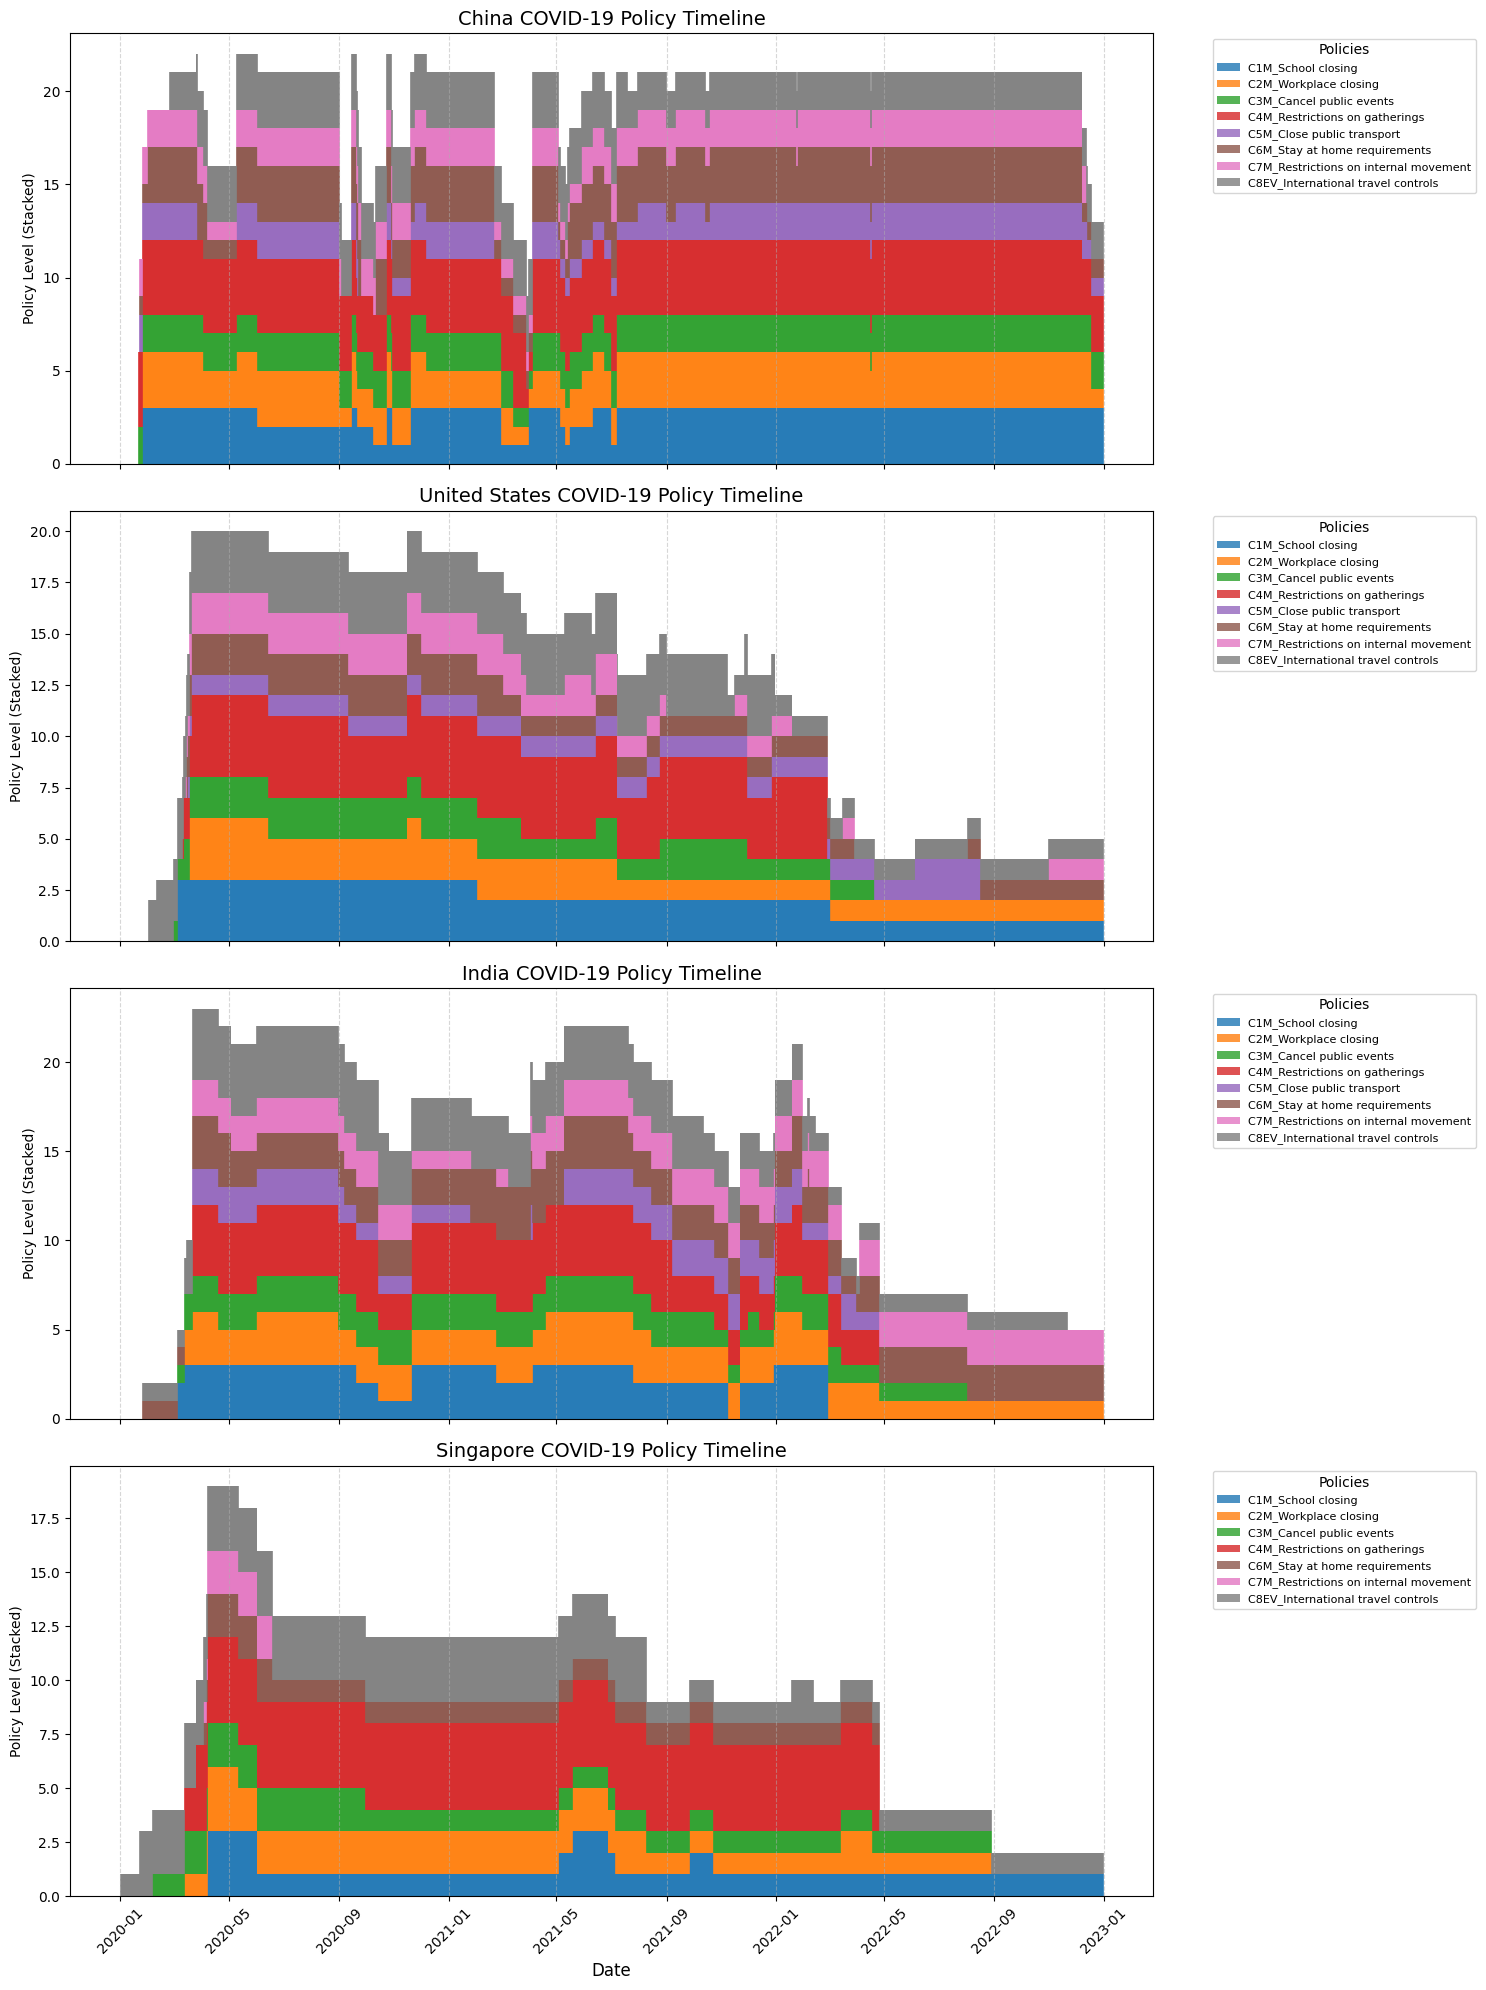

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('OxCGRT_compact_national_v1.csv')

# Define the countries and main policy indicators (excluding flags)
countries = ['China', 'United States', 'India', 'Singapore']
policy_columns = [
    'C1M_School closing', 'C2M_Workplace closing', 'C3M_Cancel public events',
    'C4M_Restrictions on gatherings', 'C5M_Close public transport',
    'C6M_Stay at home requirements', 'C7M_Restrictions on internal movement',
    'C8EV_International travel controls'
]

# Filter for selected countries
data = data[data['CountryName'].isin(countries)]

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Plot separate stacked bar charts for each country
fig, axes = plt.subplots(len(countries), 1, figsize=(15, 20), sharex=True)

for i, country in enumerate(countries):
    ax = axes[i]
    country_data = data[data['CountryName'] == country]
    
    # Initialize the 'bottom' variable for stacking
    bottom = None
    for policy in policy_columns:
        ax.bar(
            country_data['Date'],
            country_data[policy],
            label=policy if country_data[policy].any() else None,
            bottom=bottom,
            width=2,
            alpha=0.8
        )
        # Update the 'bottom' stack
        if bottom is None:
            bottom = country_data[policy]
        else:
            bottom += country_data[policy]
    
    # Customize each subplot
    ax.set_title(f'{country} COVID-19 Policy Timeline', fontsize=14)
    ax.set_ylabel('Policy Level (Stacked)', fontsize=10)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.legend(title="Policies", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)

# Customize the x-axis for all subplots
axes[-1].set_xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()








### Analysis:

The visualizations present the timeline of COVID-19 policies in China, the United States, India, and Singapore, with each country having a separate stacked bar chart. The policies include school closures, workplace closures, cancellation of public events, restrictions on gatherings, closure of public transport, stay-at-home requirements, restrictions on internal movement, and international travel controls. The policy levels reflect the stringency and progression of these interventions.

1. **China**:
   - China’s policies were implemented rapidly and strictly in the early phases of the pandemic. By early 2020, policies like school closures, workplace closures, and stay-at-home requirements were strictly enforced.
   - Public transport closure and restrictions on gatherings maintained significant levels through mid-2020. However, by 2022, the overall policy stringency decreased, reflecting a gradual reopening.

2. **United States**:
   - The United States had a staggered policy response. The policy levels escalated steadily in early 2020, peaking by mid-2020 with a high level of workplace closures and restrictions on gatherings.
   - The timeline shows fluctuations, indicating inconsistent implementations across states or periods of relaxation and tightening of restrictions.
   - By 2022, the levels of policy strictness dropped significantly, showing the nation’s shift towards reopening.

3. **India**:
   - India implemented strict policies, especially during the first wave of COVID-19 in early 2020. School closures and stay-at-home requirements were among the strongest measures during this period.
   - The timeline shows a gradual reduction in strictness over time, with a more noticeable relaxation after mid-2021. This aligns with India’s focus on economic recovery while managing subsequent waves of the pandemic.

4. **Singapore**:
   - Singapore adopted a more consistent and measured approach. Policies like school closures and workplace closures were implemented early but not as stringently compared to other countries.
   - The policy stringency remained relatively stable through 2021, reflecting Singapore’s effective containment measures and reliance on testing, contact tracing, and vaccination rather than extended lockdowns.

### Summary:
- **Policy Intensity**: China and India implemented the strictest initial measures, while Singapore relied more on consistent moderate policies.
- **Consistency**: The United States and India showed fluctuations in policy enforcement, reflecting the challenges of coordinating large populations with diverse regions.
- **Policy Duration**: Singapore maintained moderate restrictions for longer durations, whereas China’s strict measures were relaxed as the situation improved.

## 1.3.2 Policy Timeline/Milestone

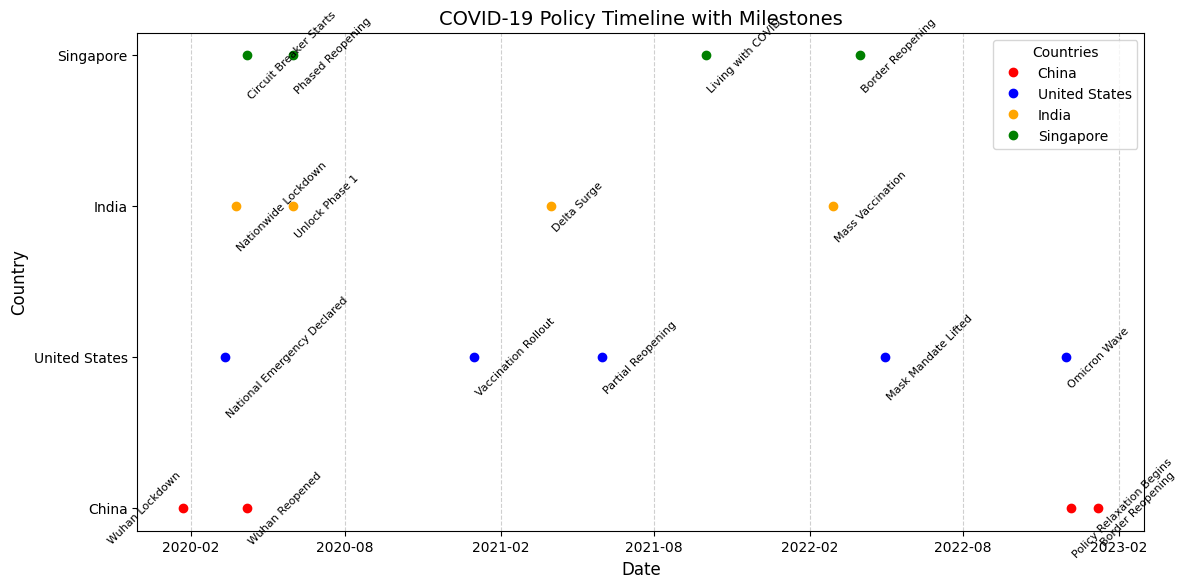

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Milestone data
policy_milestones_detailed = {
    "China": [
        ("Wuhan Lockdown", "2020-01-23"),
        ("Wuhan Reopened", "2020-04-08"),
        ("Policy Relaxation Begins", "2022-12-07"),
        ("Border Reopening", "2023-01-08")
    ],
    "United States": [
        ("National Emergency Declared", "2020-03-13"),
        ("Vaccination Rollout", "2021-01-01"),
        ("Partial Reopening", "2021-06-01"),
        ("Mask Mandate Lifted", "2022-05-01"),
        ("Omicron Wave", "2022-12-01")
    ],
    "India": [
        ("Nationwide Lockdown", "2020-03-25"),
        ("Unlock Phase 1", "2020-06-01"),
        ("Delta Surge", "2021-04-01"),
        ("Mass Vaccination", "2022-03-01")
    ],
    "Singapore": [
        ("Circuit Breaker Starts", "2020-04-07"),
        ("Phased Reopening", "2020-06-01"),
        ("Living with COVID", "2021-10-01"),
        ("Border Reopening", "2022-04-01")
    ]
}

# Convert milestones into a DataFrame for easier handling
data = []
for country, milestones in policy_milestones_detailed.items():
    for event, date in milestones:
        data.append({"Country": country, "Event": event, "Date": pd.to_datetime(date)})

milestones_df = pd.DataFrame(data)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
countries = milestones_df["Country"].unique()
colors = {"China": "red", "United States": "blue", "India": "orange", "Singapore": "green"}

for country in countries:
    country_data = milestones_df[milestones_df["Country"] == country]
    ax.plot(
        country_data["Date"],
        [country] * len(country_data),
        marker="o",
        linestyle="",
        label=country,
        color=colors[country]
    )
    for i, row in country_data.iterrows():
        ax.text(
            row["Date"],
            row["Country"],
            row["Event"],
            fontsize=8,
            ha="right" if row["Event"] == "Wuhan Lockdown" else "left",
            va="center",
            rotation=45
        )

# Customizing the plot
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.set_title("COVID-19 Policy Timeline with Milestones", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Country", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.legend(title="Countries", loc="upper right")
plt.tight_layout()
plt.show()
